<a href="https://colab.research.google.com/github/AbdullahAlTalaq/About-Me/blob/main/Stroke_journal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing and feature engineering

Section requirements:
1. imputing the dataset with various imputation techniques, minimum techniques (4): Mean, Median, Most frequent, Machine learning model
2. Assigning df variables for each imputed dataset
3. Investigating for new features and add them to the previous defined df, minimum features (3): Bmi_category, Age_category, glucose_category

## Libraries and functions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# classifiers
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE, SMOTEN, SMOTENC, KMeansSMOTE

from imblearn.under_sampling import RandomUnderSampler, TomekLinks, OneSidedSelection, NeighbourhoodCleaningRule
from imblearn.under_sampling import CondensedNearestNeighbour, ClusterCentroids, NearMiss
from imblearn.under_sampling import OneSidedSelection, EditedNearestNeighbours, RepeatedEditedNearestNeighbours


# Oversampling techniques (8)
smote = SMOTE()
ros = RandomOverSampler()
adasyn = ADASYN()
borderlinessmote = BorderlineSMOTE()
svmsmote = SVMSMOTE()
smoten = SMOTEN()
smotenc = SMOTENC(categorical_features= False)
kmeanssmote = KMeansSMOTE()

# Undersampling techniques (10)
randomundersampling = RandomUnderSampler()
tomeklinks = TomekLinks()
onesidedselection = OneSidedSelection()
neighbourhoddcleaningrule = NeighbourhoodCleaningRule()
condensednearestneighbour = CondensedNearestNeighbour()
clustercentroids = ClusterCentroids()
nearmiss = NearMiss()
onesidedselection = OneSidedSelection()
editednearestneighbours = EditedNearestNeighbours()
repeatededitednearestneighbours = RepeatedEditedNearestNeighbours()

# scaling technique
scaler = StandardScaler()


In [ ]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# stratified cross validation function

def stratified_cv(clf, X, y, n_folds=10):

  accuracy_scores = []
  precision_scores = []
  recall_scores = []
  f1_scores = []


  for fold in range(n_folds):

    X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.1, stratify=y
    )
    #print(f"fold number: {fold + 1}\n")
    #print(f'Class 1 in train ---> {sum(y_train==1)}\nClass 0 in train ---> {sum(y_train==0)}')
    #print(f'\n\nClass 1 in test ---> {sum(y_test==1)}\nClass 0 in test ---> {sum(y_test==0)}\n')


    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    #print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.5}\nPrecision: {precision_score(y_test, y_pred, average= 'binary') * 100:.5}\nRecall: {recall_score(y_test, y_pred, average= 'binary') * 100:.5}\nF1 score: {f1_score(y_test, y_pred, average= 'binary') * 100:.5}")
    #print(f"\n------------------------------\n")

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, average= "binary"))
    recall_scores.append(recall_score(y_test, y_pred, average= "binary"))
    f1_scores.append(f1_score(y_test, y_pred, average= "binary"))

  print(f"\nAfter {n_folds} stratified cross validated folds\nMean accuracy score: {np.mean(accuracy_scores) * 100:.5}\nMean precision score: {np.mean(precision_scores) * 100:.5}\nMean recall score: {np.mean(recall_scores) * 100:.5}\nMean f1 score: {np.mean(f1_scores) * 100:.5}")


In [ ]:
np.random.seed(42)
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Confusion matrix function
def cm(clf, y_true, y_pred):
  cm = confusion_matrix(y_true,
                        y_pred,
                        labels= clf.classes_)

  disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                                display_labels= clf.classes_)

  disp.plot(cmap= plt.cm.Blues)

In [ ]:
def plot_roc_curves(classifiers, X_train, X_test, y_train, y_test, labels= None, title='Receiver Operating Characteristic'):
    # Splitting the data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Plotting ROC curves for each classifier
    plt.figure(figsize=(10, 8))
    for i, clf in enumerate(classifiers):
        clf.fit(X_train, y_train)
        y_probs = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        label = f'Classifier {i + 1}' if labels is None else labels[i]
        plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

    # Plotting the random guess line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Adding labels and legend
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc='lower right', fontsize=10)
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

In [ ]:
def plot_roc_curve(clf, X_train, X_test, y_train, y_test, title='Receiver Operating Characteristic'):
    # Splitting the data into training and testing sets
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Getting predicted probabilities
    y_probs = clf.predict_proba(X_test)[:, 1]

    # Calculating ROC curve values
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plotting ROC curve with custom styling
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})', marker='o', markersize=8)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(True)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

## Preprocessing

In [ ]:
import pandas as pd
import numpy as np

df =pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Feature engineer
df['age_category'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 100], labels=['0-18', '19-35', '36-50', '51+'])

glucose_category_map = {
    'Normal': lambda x: x < 100,
    'Prediabetes': lambda x: 100 <= x <= 125,
    'Diabetes': lambda x: x >= 126
}

# Apply the conditions to the 'avg_glucose_level' column and create the 'glucose_category' column
df['glucose_category'] = pd.cut(df['avg_glucose_level'],
                                bins=[0, 100, 125, float('inf')],
                                labels=['Normal', 'Prediabetes', 'Diabetes']).astype('category')

bmi_category_map = {
    'Underweight': lambda x: x < 18.5,
    'Normal': lambda x: 18.5 <= x < 25,
    'Overweight': lambda x: 25 <= x < 30,
    'Obese': lambda x: x >= 30
}

# Apply the conditions to the 'bmi' column and create the 'bmi_category' column
df['bmi_category'] = pd.cut(df['bmi'],
                            bins=[0, 18.5, 25, 30, float('inf')],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese']).astype('category')

In [ ]:
df_mean = df.fillna(df.mean())
df_median = df.fillna(df.median())
df_mode = df.apply(lambda x:x.fillna(x.mode()[0]))



<ipython-input-15-4d3d8840ad34>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean = df.fillna(df.mean())
<ipython-input-15-4d3d8840ad34>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_median = df.fillna(df.median())


In [ ]:
# Apply the conditions to the 'bmi' column and create the 'bmi_category' column
df_mean['bmi_category'] = pd.cut(df_mean['bmi'],
                            bins=[0, 18.5, 25, 30, float('inf')],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese']).astype('category')

# Apply the conditions to the 'bmi' column and create the 'bmi_category' column
df_median['bmi_category'] = pd.cut(df_median['bmi'],
                            bins=[0, 18.5, 25, 30, float('inf')],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese']).astype('category')

# Apply the conditions to the 'bmi' column and create the 'bmi_category' column
df_mode['bmi_category'] = pd.cut(df_mode['bmi'],
                            bins=[0, 18.5, 25, 30, float('inf')],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese']).astype('category')

<ipython-input-17-b420415e9343>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


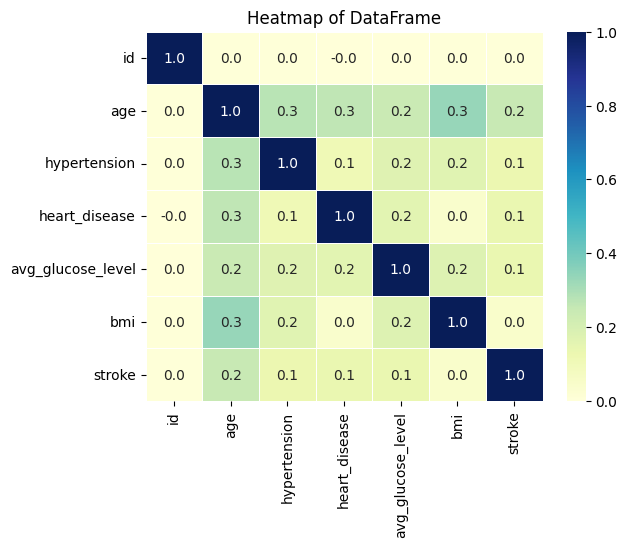

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="YlGnBu",fmt=".1f",linewidths=.5)

plt.title('Heatmap of DataFrame')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

df1 = df.dropna()
features=['age', 'hypertension', 'avg_glucose_level']
target='bmi'

X=df1[features]
y=df1[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
linear_reg_predictions = linear_reg.predict(X_test)

#Ridge Regression
ridge_reg =Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled,y_train)
ridge_reg_predictions = ridge_reg.predict(X_test_scaled)

# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train_scaled, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test_scaled)


linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)
ridge_reg_rmse = mean_squared_error(y_test, ridge_reg_predictions, squared=False)
lasso_reg_rmse = mean_squared_error(y_test, lasso_reg_predictions, squared=False)

print(f"Linear Regression RMSE: {linear_reg_rmse}")
print(f"Ridge Regression RMSE: {ridge_reg_rmse}")
print(f"Lasso Regression RMSE: {lasso_reg_rmse}")

Linear Regression RMSE: 7.806603014823699
Ridge Regression RMSE: 7.806603194651259
Lasso Regression RMSE: 7.911392458782812


In [ ]:
import pandas as pd
from scipy.stats import zscore

# Assuming df is your DataFrame with 'bmi' column

# Method 1: Z-Score
z_scores = zscore(df1['bmi'])
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Method 2: IQR (Interquartile Range)
Q1 = df1['bmi'].quantile(0.25)
Q3 = df1['bmi'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (df1['bmi'] < (Q1 - 1.5 * IQR)) | (df1['bmi'] > (Q3 + 1.5 * IQR))

# Combine results into a new DataFrame
outliers_df = pd.DataFrame({'Z-Score Outliers': outliers_zscore, 'IQR Outliers': outliers_iqr})

# Display the DataFrame with outliers flagged
print(outliers_df)

      Z-Score Outliers  IQR Outliers
0                False         False
2                False         False
3                False         False
4                False         False
5                False         False
...                ...           ...
5104             False         False
5106             False         False
5107             False         False
5108             False         False
5109             False         False

[4909 rows x 2 columns]


In [ ]:
import pandas as pd
from scipy.stats import zscore

# Assuming df is your DataFrame with 'bmi' column

# Method 1: Z-Score
z_scores = zscore(df1['bmi'])
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Method 2: IQR (Interquartile Range)
Q1 = df1['bmi'].quantile(0.25)
Q3 = df1['bmi'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (df1['bmi'] < (Q1 - 1.5 * IQR)) | (df1['bmi'] > (Q3 + 1.5 * IQR))

# Count the number of outliers based on Z-Score or IQR
count_zscore_outliers = outliers_zscore.sum()
count_iqr_outliers = outliers_iqr.sum()

print(f"Number of Z-Score outliers: {count_zscore_outliers}")
print(f"Number of IQR outliers: {count_iqr_outliers}")

Number of Z-Score outliers: 58
Number of IQR outliers: 110


In [ ]:
import pandas as pd
from scipy.stats import zscore

# Assuming df is your DataFrame with 'bmi' column

# Method 1: Z-Score
z_scores = zscore(df1['bmi'])
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Method 2: IQR (Interquartile Range)
Q1 = df1['bmi'].quantile(0.25)
Q3 = df1['bmi'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = (df1['bmi'] < (Q1 - 1.5 * IQR)) | (df1['bmi'] > (Q3 + 1.5 * IQR))

# Combine outlier flags using OR (|) condition
all_outliers = outliers_zscore | outliers_iqr

# Drop rows with outliers
df_cleaned = df1.drop(df1[all_outliers].index)

# Display the cleaned DataFrame
print(df_cleaned)


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


features=['age', 'hypertension', 'avg_glucose_level']
target='bmi'

X=df_cleaned[features]
y=df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
linear_reg_predictions = linear_reg.predict(X_test)

#Ridge Regression
ridge_reg =Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled,y_train)
ridge_reg_predictions = ridge_reg.predict(X_test_scaled)


# Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train_scaled, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test_scaled)


linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)
ridge_reg_rmse = mean_squared_error(y_test, ridge_reg_predictions, squared=False)
lasso_reg_rmse = mean_squared_error(y_test, lasso_reg_predictions, squared=False)

print(f"Linear Regression RMSE: {linear_reg_rmse}")
print(f"Ridge Regression RMSE: {ridge_reg_rmse}")
print(f"Lasso Regression RMSE: {lasso_reg_rmse}")

Linear Regression RMSE: 6.2285228223369895
Ridge Regression RMSE: 6.228516614457445
Lasso Regression RMSE: 6.338253840298222


In [ ]:
import pandas as pd

# Assuming df is your DataFrame with 'bmi' column and null values

# Identify rows with null values in the 'bmi' column
null_bmi_rows = df['bmi'].isnull()

# Convert linear_reg_predictions to a pandas Series with the same index as df for null rows
linear_reg_series = pd.Series(linear_reg_predictions[:sum(null_bmi_rows)], index=df.index[null_bmi_rows])

# Fill null values with predictions from Linear Regression
df['bmi_linear_reg'] = df['bmi'].fillna(linear_reg_series)

ridge_reg_series = pd.Series(ridge_reg_predictions[:sum(null_bmi_rows)], index=df.index[null_bmi_rows])

# Fill null values with predictions from Ridge Regression
df['bmi_ridge_reg'] = df['bmi'].fillna(ridge_reg_series)

# Convert lasso_reg_predictions to a pandas Series with the same index as df for null rows
lasso_reg_series = pd.Series(lasso_reg_predictions[:sum(null_bmi_rows)], index=df.index[null_bmi_rows])

# Fill null values with predictions from Lasso Regression
df['bmi_lasso_reg'] = df['bmi'].fillna(lasso_reg_series)

# Display the DataFrame with filled null values
print(df)



         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
# Check lengths of different columns
print("Length of 'bmi_ridge_reg':", len(df['bmi_ridge_reg']))
print("Length of 'bmi_linear_reg':", len(df['bmi_linear_reg']))
print("Length of 'bmi_lasso_reg':", len(df['bmi_lasso_reg']))
print("Length of 'bmi' after mean imputation:", len(df_mean['bmi']))
print("Length of 'bmi' after median imputation:", len(df_median['bmi']))
print("Length of 'bmi' after mode imputation:", len(df_mode['bmi']))


Length of 'bmi_ridge_reg': 5110
Length of 'bmi_linear_reg': 5110
Length of 'bmi_lasso_reg': 5110
Length of 'bmi' after mean imputation: 5110
Length of 'bmi' after median imputation: 5110
Length of 'bmi' after mode imputation: 5110


In [ ]:
max_bmi_index = df['bmi'].idxmax()
highest_bmi = df.loc[max_bmi_index, 'bmi']

max_age_index = df['age'].idxmax()
highest_age = df.loc[max_age_index, 'age']

max_hypertension_index = df['hypertension'].idxmax()
highest_hypertension = df.loc[max_hypertension_index, 'hypertension']

print("Highest BMI:", highest_bmi)
print("Index of Highest BMI:", max_bmi_index)
print("\nHighest Age:", highest_age)
print("Index of Highest Age:", max_age_index)
print("\nHighest Hypertension:", highest_hypertension)
print("Index of Highest Hypertension:", max_hypertension_index)

Highest BMI: 97.6
Index of Highest BMI: 2128

Highest Age: 82.0
Index of Highest Age: 23

Highest Hypertension: 1
Index of Highest Hypertension: 4


In [ ]:
df['bmi_category_linear_reg'] = pd.cut(df['bmi_linear_reg'], bins=[0, 18.5, 24.9, 29.9, 75], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['bmi_category_lasso_reg'] = pd.cut(df['bmi_lasso_reg'], bins=[0, 18.5, 24.9, 29.9, 75], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['bmi_category_rideg_reg'] = pd.cut(df['bmi_ridge_reg'], bins=[0, 18.5, 24.9, 29.9, 75], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [ ]:
df = df.drop('bmi', axis=1)

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

id                         0
gender                     0
age                        0
hypertension               0
heart_disease              0
ever_married               0
work_type                  0
Residence_type             0
avg_glucose_level          0
smoking_status             0
stroke                     0
age_category               0
glucose_category           0
bmi_category               0
bmi_linear_reg             0
bmi_ridge_reg              0
bmi_lasso_reg              0
bmi_category_linear_reg    0
bmi_category_lasso_reg     0
bmi_category_rideg_reg     0
dtype: int64

In [ ]:
df_ridge = df.drop(["bmi_category", "bmi_linear_reg", "bmi_lasso_reg", "bmi_category_linear_reg", "bmi_category_lasso_reg"], axis= 1)
df_ridge

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,age_category,glucose_category,bmi_ridge_reg,bmi_category_rideg_reg
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,51+,Diabetes,36.6,Obese
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,51+,Prediabetes,32.5,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,36-50,Diabetes,34.4,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,51+,Diabetes,24.0,Normal
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,formerly smoked,1,51+,Diabetes,29.0,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,Unknown,0,0-18,Prediabetes,18.6,Normal
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0,51+,Diabetes,40.0,Obese
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0,19-35,Normal,30.6,Obese
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0,51+,Diabetes,25.6,Overweight


In [ ]:
df_mean.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_category         0
glucose_category     0
bmi_category         0
dtype: int64

In [ ]:
df_median.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_category         0
glucose_category     0
bmi_category         0
dtype: int64

In [ ]:
df_mode.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_category         0
glucose_category     0
bmi_category         0
dtype: int64

In [ ]:
df_ridge.isna().sum()

id                        0
gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
smoking_status            0
stroke                    0
age_category              0
glucose_category          0
bmi_ridge_reg             0
bmi_category_rideg_reg    0
dtype: int64

# Data analysis

Section requirements:
1. Analyze the data and show meaningful insights from only one of the df, compare, and show relations

the distributions of the predicted 'bmi' values using different regression models.

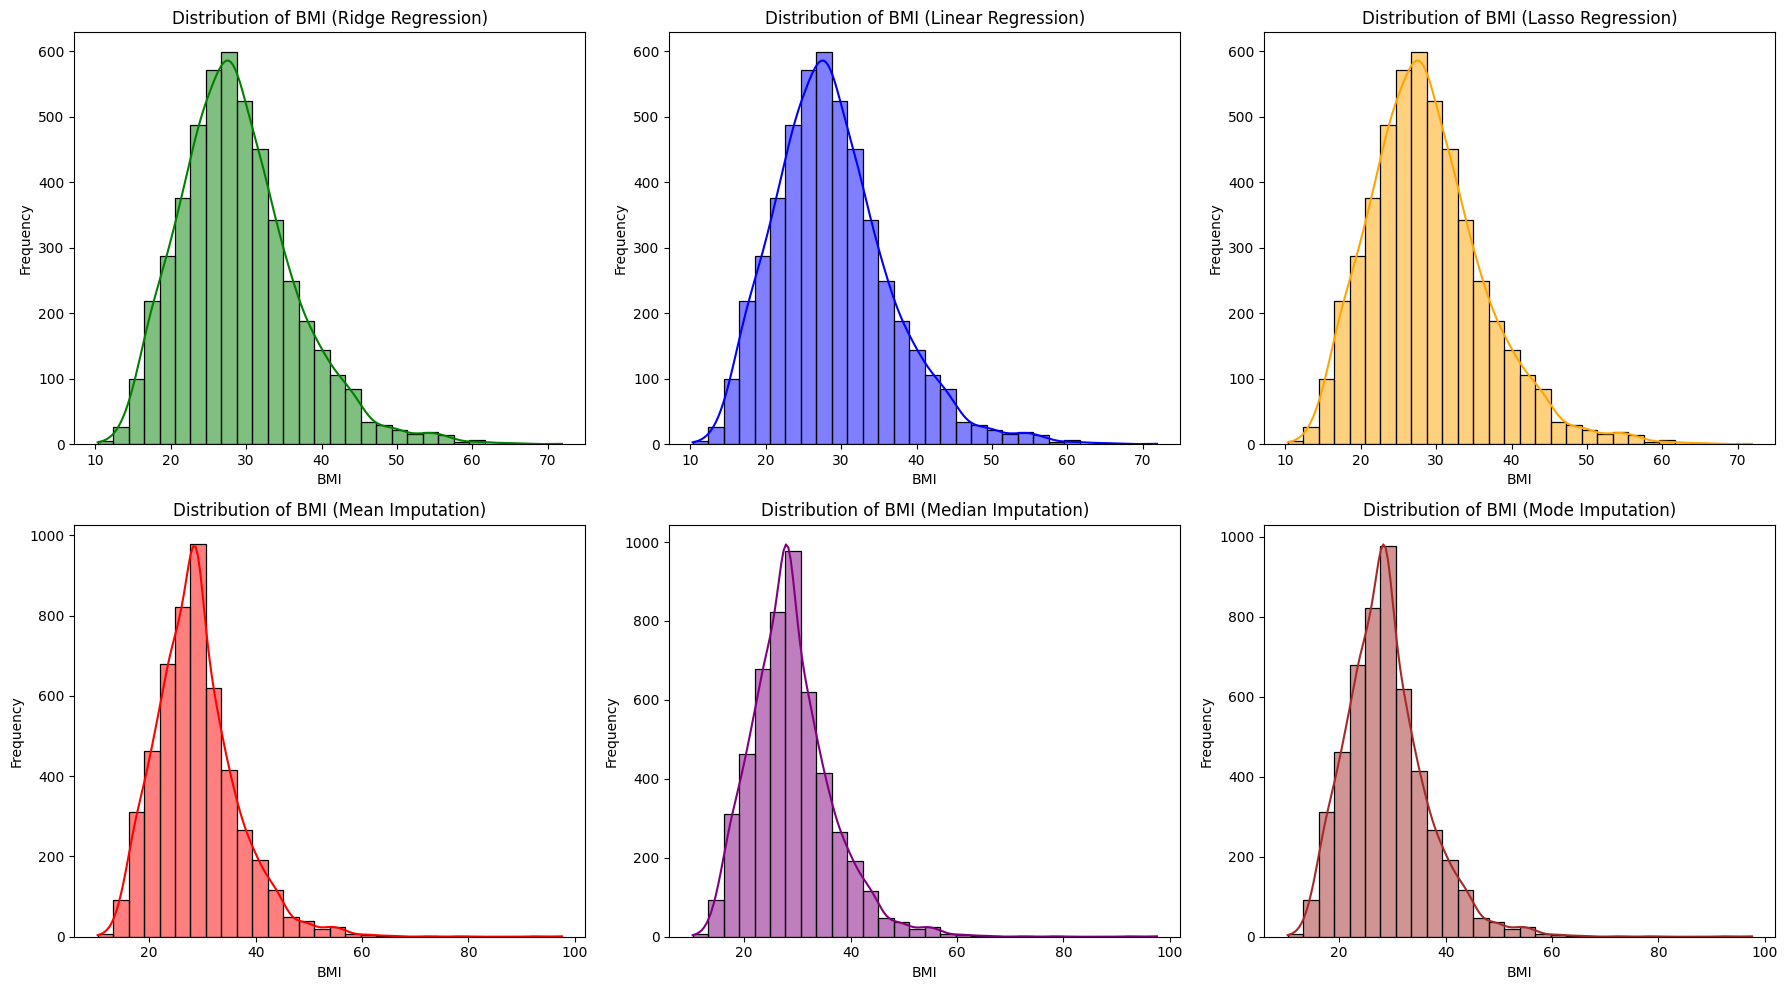

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_mean, df_median, df_mode are DataFrames with 'bmi' column imputed using mean, median, mode
# Assuming df is your DataFrame with 'bmi_ridge_reg', 'bmi_linear_reg', 'bmi_lasso_reg' columns

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Distribution plot for 'bmi_ridge_reg'
sns.histplot(df['bmi_ridge_reg'], kde=True, bins=30, color='green', label='Ridge Regression', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of BMI (Ridge Regression)')
axes[0, 0].set_xlabel('BMI')
axes[0, 0].set_ylabel('Frequency')

# Distribution plot for 'bmi_linear_reg'
sns.histplot(df['bmi_linear_reg'], kde=True, bins=30, color='blue', label='Linear Regression', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of BMI (Linear Regression)')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

# Distribution plot for 'bmi_lasso_reg'
sns.histplot(df['bmi_lasso_reg'], kde=True, bins=30, color='orange', label='Lasso Regression', ax=axes[0, 2])
axes[0, 2].set_title('Distribution of BMI (Lasso Regression)')
axes[0, 2].set_xlabel('BMI')
axes[0, 2].set_ylabel('Frequency')

# Distribution plot for 'bmi' using mean imputation
sns.histplot(df_mean['bmi'], kde=True, bins=30, color='red', label='Mean Imputation', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of BMI (Mean Imputation)')
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('Frequency')

# Distribution plot for 'bmi' using median imputation
sns.histplot(df_median['bmi'], kde=True, bins=30, color='purple', label='Median Imputation', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of BMI (Median Imputation)')
axes[1, 1].set_xlabel('BMI')
axes[1, 1].set_ylabel('Frequency')

# Distribution plot for 'bmi' using mode imputation
sns.histplot(df_mode['bmi'], kde=True, bins=30, color='brown', label='Mode Imputation', ax=axes[1, 2])
axes[1, 2].set_title('Distribution of BMI (Mode Imputation)')
axes[1, 2].set_xlabel('BMI')
axes[1, 2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Check lengths of different columns
print("Length of 'bmi_ridge_reg':", len(df['bmi_ridge_reg']))
print("Length of 'bmi_linear_reg':", len(df['bmi_linear_reg']))
print("Length of 'bmi_lasso_reg':", len(df['bmi_lasso_reg']))
print("Length of 'bmi' after mean imputation:", len(df_mean['bmi']))
print("Length of 'bmi' after median imputation:", len(df_median['bmi']))
print("Length of 'bmi' after mode imputation:", len(df_mode['bmi']))

Length of 'bmi_ridge_reg': 4906
Length of 'bmi_linear_reg': 4906
Length of 'bmi_lasso_reg': 4906
Length of 'bmi' after mean imputation: 5110
Length of 'bmi' after median imputation: 5110
Length of 'bmi' after mode imputation: 5110


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4906 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       4906 non-null   int64   
 1   gender                   4906 non-null   object  
 2   age                      4906 non-null   float64 
 3   hypertension             4906 non-null   int64   
 4   heart_disease            4906 non-null   int64   
 5   ever_married             4906 non-null   object  
 6   work_type                4906 non-null   object  
 7   Residence_type           4906 non-null   object  
 8   avg_glucose_level        4906 non-null   float64 
 9   smoking_status           4906 non-null   object  
 10  stroke                   4906 non-null   int64   
 11  age_category             4906 non-null   category
 12  glucose_category         4906 non-null   category
 13  bmi_category             4906 non-null   category
 14  bmi_line

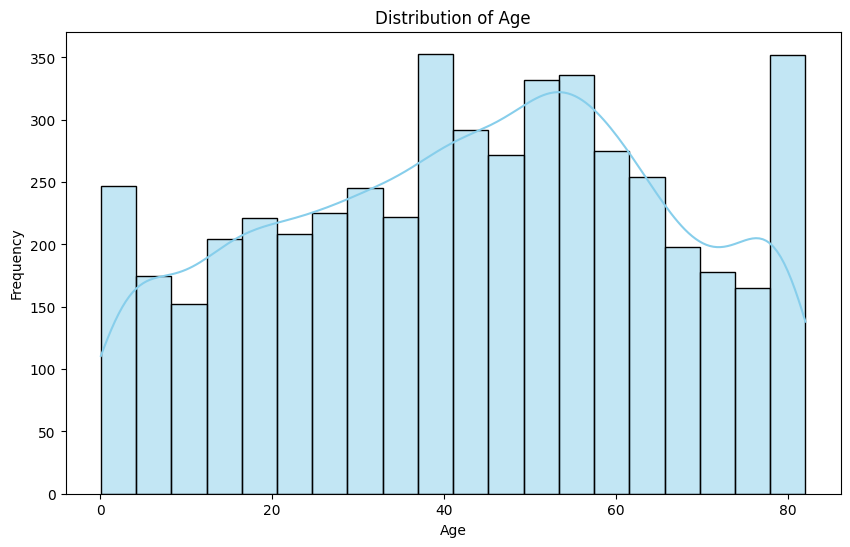

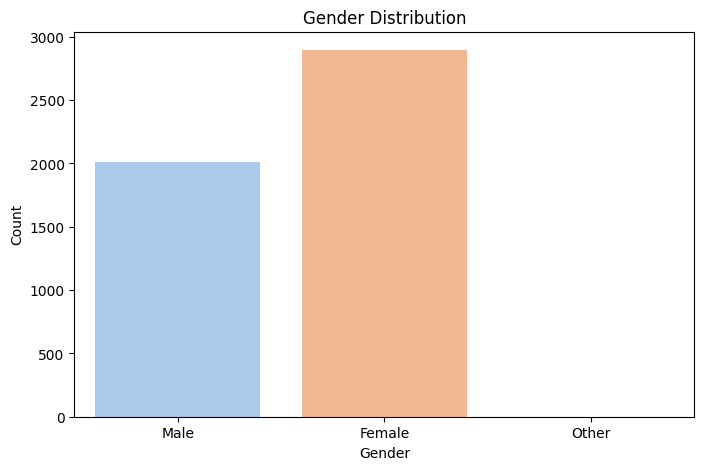

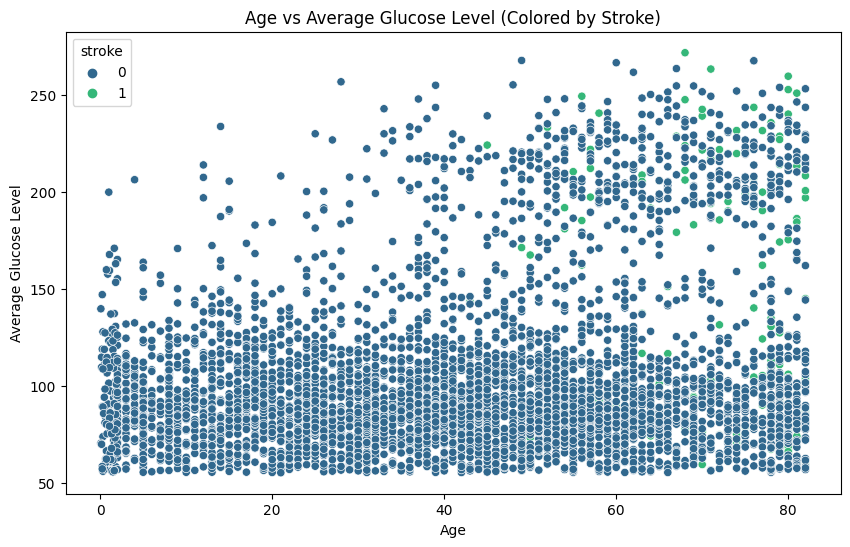

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_glucose_level', data=df, hue='stroke', palette='viridis')
plt.title('Age vs Average Glucose Level (Colored by Stroke)')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

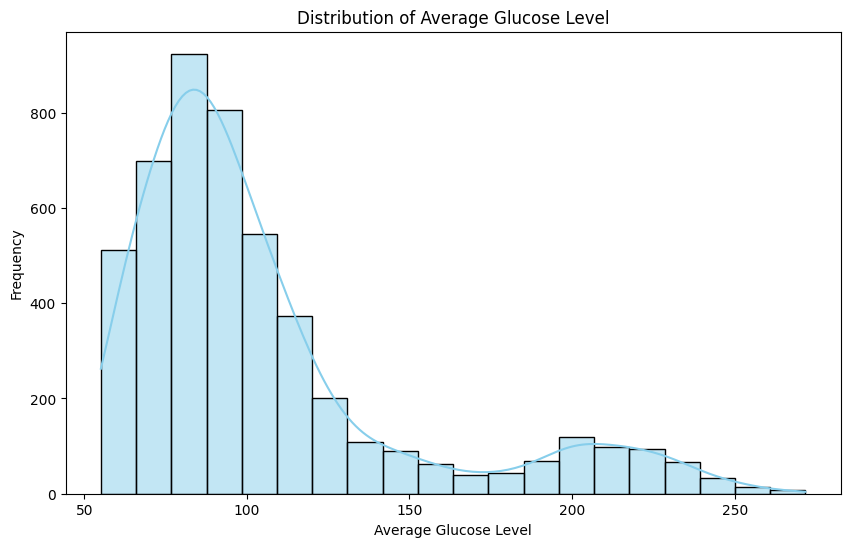

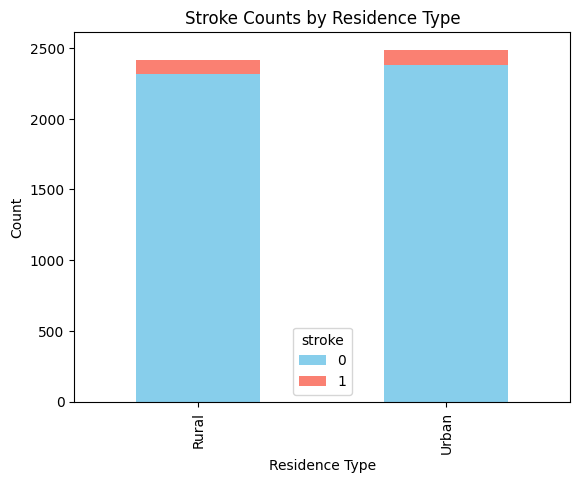

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_glucose_level'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Glucose Level')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.show()

pd.crosstab(df['Residence_type'], df['stroke']).plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Stroke Counts by Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.show()

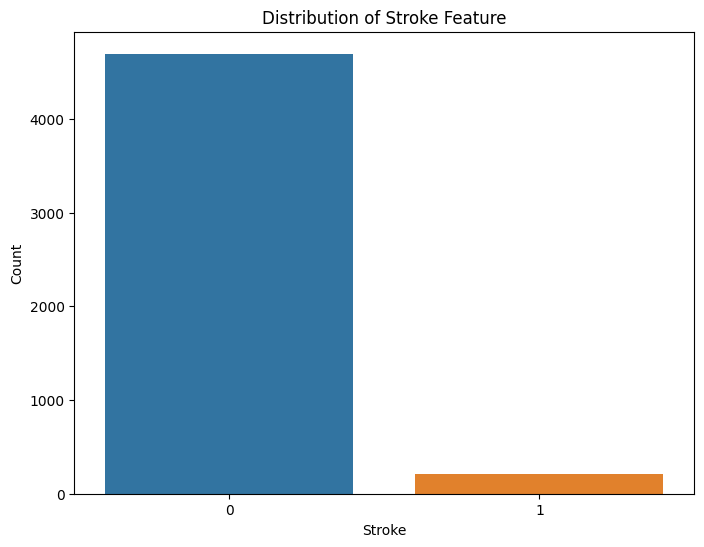

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Feature')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

# Machine learning modelling

Section requirements:
1. Normal dataset modelling for each given df
2. Oversampled dataset modelling for each given df
3. Undersampled dataset modelling for each given df

### Normal

#### Mean

##### 2. RandomOverSampler

In [ ]:
# Encode the data
X = df_mean.drop(["stroke", "id"], axis= 1)
y = df_mean.stroke
le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X

for i in X_le.columns:
  if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
    X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_ohe,
                                                    y,
                                                    test_size= 0.1,
                                                    random_state= 42)

In [ ]:
np.random.seed(42)
#KNN
# Getting the model ready

clf_oversampled_knn_ohe = KNeighborsClassifier(algorithm= "auto",
                                               leaf_size= 10,
                                               metric= "euclidean",
                                               n_jobs= -1,
                                               n_neighbors= 1)

stratified_cv(clf_oversampled_knn_ohe,
              X_ohe,
              y)


After 10 stratified cross validated folds
Mean accuracy score: 91.311
Mean precision score: 9.8282
Mean recall score: 9.6
Mean f1 score: 9.6424


In [ ]:
np.random.seed(42)
# SVM
# Getting the model ready
clf_oversampled_svm_ohe = SVC(random_state= 42,
                              C= 0.01,
                              gamma= "scale",
                              kernel= "poly")

# {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}

stratified_cv(clf_oversampled_svm_ohe,
              X_ohe,
              y)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin


After 10 stratified cross validated folds
Mean accuracy score: 95.108
Mean precision score: 0.0
Mean recall score: 0.0
Mean f1 score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
np.random.seed(42)
# LR
# Getting the model ready
clf_oversampled_lr_ohe = LogisticRegression(random_state= 42,
                                            C= 1.0,
                                            max_iter= 100,
                                            n_jobs= -1,
                                            penalty= "l2",
                                            solver= "liblinear")

# {'C': 1.0, 'max_iter': 200, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}

stratified_cv(clf_oversampled_lr_ohe,
              X_ohe,
              y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  


After 10 stratified cross validated folds
Mean accuracy score: 94.951
Mean precision score: 30.0
Mean recall score: 1.6
Mean f1 score: 3.0199


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


In [ ]:
np.random.seed(42)
# NB
# Getting the model ready
clf_oversample_nb_smote = GaussianNB(priors= None)

# {'priors': None}

stratified_cv(clf_oversample_nb_smote,
              X_ohe.toarray(),
              y)


After 10 stratified cross validated folds
Mean accuracy score: 77.143
Mean precision score: 9.9669
Mean recall score: 45.6
Mean f1 score: 16.352


In [ ]:
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier

# Getting the model ready
clf_oversample_dt_smote = DecisionTreeClassifier(criterion= "gini",
                                                 max_depth= None,
                                                 max_features= None,
                                                 min_samples_leaf= 2,
                                                 min_samples_split= 5,
                                                 random_state= 42,
                                                 splitter= "random")

# {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}

stratified_cv(clf_oversample_dt_smote,
              X_ohe,
              y)


After 10 stratified cross validated folds
Mean accuracy score: 93.738
Mean precision score: 19.317
Mean recall score: 7.2
Mean f1 score: 10.236


In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# RF
# Getting the model ready
clf_normal_rf_ohe = RandomForestClassifier(criterion= "gini",
                                           max_depth= None,
                                           max_features= "auto",
                                           min_samples_leaf= 1,
                                           min_samples_split= 2,
                                           n_estimators= 50,
                                           random_state= 42,
                                           n_jobs= -1)

# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 42}
stratified_cv(clf_normal_rf_ohe,
              X_ohe,
              y)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/loca


After 10 stratified cross validated folds
Mean accuracy score: 95.068
Mean precision score: 0.0
Mean recall score: 0.0
Mean f1 score: 0.0


In [ ]:
np.random.seed(42)
from sklearn.ensemble import ExtraTreesClassifier

# ET
# Getting the model ready
clf_normal_et_ohe = ExtraTreesClassifier(criterion= "gini",
                                         max_depth= None,
                                         max_features= "auto",
                                         min_samples_leaf= 1,
                                         min_samples_split= 2,
                                         n_estimators= 50,
                                         random_state= 42,
                                         n_jobs= -1)
# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}

stratified_cv(clf_normal_et_ohe,
              X_ohe,
              y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/loca


After 10 stratified cross validated folds
Mean accuracy score: 95.068
Mean precision score: 0.0
Mean recall score: 0.0
Mean f1 score: 0.0


In [ ]:
np.random.seed(42)
from sklearn.ensemble import AdaBoostClassifier

# Adaboost
# Getting the model ready
clf_normal_ada_ohe = AdaBoostClassifier(algorithm= "SAMME.R",
                                        learning_rate= 1.0,
                                        n_estimators= 100,
                                        random_state= 42)


# {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 42}

stratified_cv(clf_normal_ada_ohe,
              X_ohe,
              y)


After 10 stratified cross validated folds
Mean accuracy score: 94.481
Mean precision score: 19.303
Mean recall score: 4.4
Mean f1 score: 6.9395


In [ ]:
np.random.seed(42)
from xgboost import XGBClassifier

# Xgboost
# Getting the model ready
clf_normal_xgb_ohe = XGBClassifier(colsample_bytree= 1,
                                   device= "cuda",
                                   gamma= 0,
                                   max_depth= 6,
                                   min_child_weight= 1,
                                   subsample= 1,
                                   random_state= 42)

# {'colsample_bytree': 1, 'device': 'cuda', 'gamma': 0, 'max_depth': 15, 'min_child_weight': 1, 'subsample': 1}


stratified_cv(clf_normal_xgb_ohe,
              X_ohe,
              y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:09:29] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:09:30] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:09:33] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:09:34] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:09:34] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



After 10 stratified cross validated folds
Mean accuracy score: 94.501
Mean precision score: 25.894
Mean recall score: 5.6
Mean f1 score: 8.6236


### Oversampling

#### Mean

##### 2. RandomOverSampler

In [ ]:
# Smote walkthrough
X = df_mean.drop(["stroke", "id"], axis= 1)
y = df_mean.stroke
le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X

for i in X_le.columns:
  if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
    X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform SMOTE
X_r, y_r = ros.fit_resample(X_ohe, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_r,
                                                    y_r,
                                                    test_size= 0.2,
                                                    random_state= 42)

In [ ]:
np.random.seed(42)
#KNN
# Getting the model ready

clf_oversampled_knn_ohe = KNeighborsClassifier(algorithm= "auto",
                                               leaf_size= 10,
                                               metric= "euclidean",
                                               n_jobs= -1,
                                               n_neighbors= 1)

stratified_cv(clf_oversampled_knn_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 92.724
Mean precision score: 87.332
Mean recall score: 100.0
Mean f1 score: 93.229


In [ ]:
np.random.seed(42)
# SVM
# Getting the model ready
clf_oversampled_svm_ohe = SVC(random_state= 42,
                              C= 1.0,
                              gamma= "scale",
                              kernel= "poly")

# {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}

stratified_cv(clf_oversampled_svm_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 99.26
Mean precision score: 98.544
Mean recall score: 100.0
Mean f1 score: 99.266


In [ ]:
np.random.seed(42)
# LR
# Getting the model ready
clf_oversampled_lr_ohe = LogisticRegression(random_state= 42,
                                            C= 1.0,
                                            max_iter= 200,
                                            n_jobs= -1,
                                            penalty= "l1",
                                            solver= "saga")

# {'C': 1.0, 'max_iter': 200, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}

stratified_cv(clf_oversampled_lr_ohe,
              X_r,
              y_r)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 


After 10 stratified cross validated folds
Mean accuracy score: 98.51
Mean precision score: 97.111
Mean recall score: 100.0
Mean f1 score: 98.533


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
np.random.seed(42)
# NB
# Getting the model ready
clf_oversample_nb_smote = GaussianNB(priors= None)

# {'priors': None}

stratified_cv(clf_oversample_nb_smote,
              X_r.toarray(),
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 88.715
Mean precision score: 81.599
Mean recall score: 100.0
Mean f1 score: 89.865


In [ ]:
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier

# Getting the model ready
clf_oversample_dt_smote = DecisionTreeClassifier(criterion= "entropy",
                                                 max_depth= None,
                                                 max_features= None,
                                                 min_samples_leaf= 3,
                                                 min_samples_split= 2,
                                                 random_state= 42,
                                                 splitter= "random")

# {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}

stratified_cv(clf_oversample_dt_smote,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 98.541
Mean precision score: 97.171
Mean recall score: 100.0
Mean f1 score: 98.564


In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# RF
# Getting the model ready
clf_normal_rf_ohe = RandomForestClassifier(criterion= "entropy",
                                           max_depth= None,
                                           max_features= "auto",
                                           min_samples_leaf= 1,
                                           min_samples_split= 2,
                                           n_estimators= 50,
                                           random_state= 42,
                                           n_jobs= -1)

# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 42}
stratified_cv(clf_normal_rf_ohe,
              X_r,
              y_r)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


After 10 stratified cross validated folds
Mean accuracy score: 99.743
Mean precision score: 99.49
Mean recall score: 100.0
Mean f1 score: 99.744


In [ ]:
np.random.seed(42)
from sklearn.ensemble import ExtraTreesClassifier

# ET
# Getting the model ready
clf_normal_et_ohe = ExtraTreesClassifier(criterion= "entropy",
                                         max_depth= None,
                                         max_features= "auto",
                                         min_samples_leaf= 1,
                                         min_samples_split= 2,
                                         n_estimators= 100,
                                         random_state= 42,
                                         n_jobs= -1)
# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}

stratified_cv(clf_normal_et_ohe,
              X_r,
              y_r)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


After 10 stratified cross validated folds
Mean accuracy score: 99.938
Mean precision score: 99.877
Mean recall score: 100.0
Mean f1 score: 99.939


In [ ]:
np.random.seed(42)
from sklearn.ensemble import AdaBoostClassifier

# Adaboost
# Getting the model ready
clf_normal_ada_ohe = AdaBoostClassifier(algorithm= "SAMME.R",
                                        learning_rate= 1.0,
                                        n_estimators= 100,
                                        random_state= 42)


# {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 42}

stratified_cv(clf_normal_ada_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 87.811
Mean precision score: 82.57
Mean recall score: 95.952
Mean f1 score: 88.737


In [ ]:
np.random.seed(42)
from xgboost import XGBClassifier

# Xgboost
# Getting the model ready
clf_normal_xgb_ohe = XGBClassifier(colsample_bytree= 1,
                                   device= "cuda",
                                   gamma= 0,
                                   max_depth= 15,
                                   min_child_weight= 1,
                                   subsample= 1,
                                   random_state= 42)

# {'colsample_bytree': 1, 'device': 'cuda', 'gamma': 0, 'max_depth': 15, 'min_child_weight': 1, 'subsample': 1}


stratified_cv(clf_normal_xgb_ohe,
              X_r,
              y_r)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:01] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:02] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:04] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:05] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:14:08] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



After 10 stratified cross validated folds
Mean accuracy score: 98.212
Mean precision score: 96.552
Mean recall score: 100.0
Mean f1 score: 98.245


#### Ridge regression

##### 2. RandomOverSampler

In [ ]:
# Smote walkthrough
X = df_ridge.drop(["stroke", "id"], axis= 1)
y = df_ridge.stroke
le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X

for i in X_le.columns:
  if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
    X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform SMOTE
X_r, y_r = ros.fit_resample(X_ohe, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_r,
                                                    y_r,
                                                    test_size= 0.2,
                                                    random_state= 42)

In [ ]:
np.random.seed(42)
#KNN
# Getting the model ready

clf_oversampled_knn_ohe = KNeighborsClassifier(algorithm= "auto",
                                               leaf_size= 10,
                                               metric= "euclidean",
                                               n_jobs= -1,
                                               n_neighbors= 1)

stratified_cv(clf_oversampled_knn_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 92.979
Mean precision score: 87.698
Mean recall score: 100.0
Mean f1 score: 93.443


In [ ]:
np.random.seed(42)
# SVM
# Getting the model ready
clf_oversampled_svm_ohe = SVC(random_state= 42,
                              C= 1.0,
                              gamma= "scale",
                              kernel= "poly")

# {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}

stratified_cv(clf_oversampled_svm_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 99.404
Mean precision score: 98.825
Mean recall score: 100.0
Mean f1 score: 99.408


In [ ]:
np.random.seed(42)
# LR
# Getting the model ready
clf_oversampled_lr_ohe = LogisticRegression(random_state= 42,
                                            C= 1.0,
                                            max_iter= 100,
                                            n_jobs= -1,
                                            penalty= "l1",
                                            solver= "liblinear")

# {'C': 1.0, 'max_iter': 200, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}

stratified_cv(clf_oversampled_lr_ohe,
              X_r,
              y_r)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  


After 10 stratified cross validated folds
Mean accuracy score: 98.84
Mean precision score: 97.739
Mean recall score: 100.0
Mean f1 score: 98.855


In [ ]:
np.random.seed(42)
# NB
# Getting the model ready
clf_oversample_nb_smote = GaussianNB(priors= None)

# {'priors': None}

stratified_cv(clf_oversample_nb_smote,
              X_r.toarray(),
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 88.66
Mean precision score: 81.532
Mean recall score: 100.0
Mean f1 score: 89.821


In [ ]:
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier

# Getting the model ready
clf_oversample_dt_smote = DecisionTreeClassifier(criterion= "gini",
                                                 max_depth= None,
                                                 max_features= None,
                                                 min_samples_leaf= 3,
                                                 min_samples_split= 2,
                                                 random_state= 42,
                                                 splitter= "best")

# {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}

stratified_cv(clf_oversample_dt_smote,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 98.17
Mean precision score: 96.474
Mean recall score: 100.0
Mean f1 score: 98.204


In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# RF
# Getting the model ready
clf_normal_rf_ohe = RandomForestClassifier(criterion= "entropy",
                                           max_depth= None,
                                           max_features= "auto",
                                           min_samples_leaf= 1,
                                           min_samples_split= 2,
                                           n_estimators= 50,
                                           random_state= 42,
                                           n_jobs= -1)

# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 42}
stratified_cv(clf_normal_rf_ohe,
              X_r,
              y_r)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


After 10 stratified cross validated folds
Mean accuracy score: 99.936
Mean precision score: 99.873
Mean recall score: 100.0
Mean f1 score: 99.936


In [ ]:
np.random.seed(42)
from sklearn.ensemble import ExtraTreesClassifier

# ET
# Getting the model ready
clf_normal_et_ohe = ExtraTreesClassifier(criterion= "entropy",
                                         max_depth= None,
                                         max_features= "sqrt",
                                         min_samples_leaf= 1,
                                         min_samples_split= 2,
                                         n_estimators= 100,
                                         random_state= 42,
                                         n_jobs= -1)
# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}

stratified_cv(clf_normal_et_ohe,
              X_r,
              y_r,
              n_folds= 5)


After 5 stratified cross validated folds
Mean accuracy score: 100.0
Mean precision score: 100.0
Mean recall score: 100.0
Mean f1 score: 100.0


In [ ]:
np.random.seed(42)
from sklearn.ensemble import AdaBoostClassifier

# Adaboost
# Getting the model ready
clf_normal_ada_ohe = AdaBoostClassifier(algorithm= "SAMME.R",
                                        learning_rate= 1.0,
                                        n_estimators= 100,
                                        random_state= 42)


# {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 42}

stratified_cv(clf_normal_ada_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 88.543
Mean precision score: 84.156
Mean recall score: 94.979
Mean f1 score: 89.232


In [ ]:
np.random.seed(42)
from xgboost import XGBClassifier

# Xgboost
# Getting the model ready
clf_normal_xgb_ohe = XGBClassifier(colsample_bytree= 1,
                                   device= "cuda",
                                   gamma= 0,
                                   max_depth= 15,
                                   min_child_weight= 1,
                                   subsample= 1,
                                   random_state= 42)

# {'colsample_bytree': 1, 'device': 'cuda', 'gamma': 0, 'max_depth': 15, 'min_child_weight': 1, 'subsample': 1}


stratified_cv(clf_normal_xgb_ohe,
              X_r,
              y_r)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:17:27] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:17:30] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:17:32] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:17:33] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:17:35] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



After 10 stratified cross validated folds
Mean accuracy score: 98.085
Mean precision score: 96.316
Mean recall score: 100.0
Mean f1 score: 98.122


#### Median

##### 2. RandomOverSampler

In [ ]:
# Smote walkthrough
X = df_median.drop(["stroke", "id"], axis= 1)
y = df_median.stroke
le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X

for i in X_le.columns:
  if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
    X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform SMOTE
X_r, y_r = ros.fit_resample(X_ohe, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_r,
                                                    y_r,
                                                    test_size= 0.2,
                                                    random_state= 42)

In [ ]:
np.random.seed(42)
#KNN
# Getting the model ready

clf_oversampled_knn_ohe = KNeighborsClassifier(algorithm= "auto",
                                               leaf_size= 10,
                                               metric= "euclidean",
                                               n_jobs= -1,
                                               n_neighbors= 1)

stratified_cv(clf_oversampled_knn_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 92.497
Mean precision score: 86.978
Mean recall score: 100.0
Mean f1 score: 93.03


In [ ]:
np.random.seed(42)
# SVM
# Getting the model ready
clf_oversampled_svm_ohe = SVC(random_state= 42,
                              C= 1.0,
                              gamma= "scale",
                              kernel= "poly")

# {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}

stratified_cv(clf_oversampled_svm_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 99.188
Mean precision score: 98.405
Mean recall score: 100.0
Mean f1 score: 99.195


In [ ]:
np.random.seed(42)
# LR
# Getting the model ready
clf_oversampled_lr_ohe = LogisticRegression(random_state= 42,
                                            C= 1.0,
                                            max_iter= 100,
                                            n_jobs= -1,
                                            penalty= "l1",
                                            solver= "liblinear")

# {'C': 1.0, 'max_iter': 200, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}

stratified_cv(clf_oversampled_lr_ohe,
              X_r,
              y_r)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  


After 10 stratified cross validated folds
Mean accuracy score: 98.489
Mean precision score: 97.074
Mean recall score: 100.0
Mean f1 score: 98.514


In [ ]:
np.random.seed(42)
# NB
# Getting the model ready
clf_oversample_nb_smote = GaussianNB(priors= None)

# {'priors': None}

stratified_cv(clf_oversample_nb_smote,
              X_r.toarray(),
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 88.715
Mean precision score: 81.599
Mean recall score: 100.0
Mean f1 score: 89.865


In [ ]:
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier

# Getting the model ready
clf_oversample_dt_smote = DecisionTreeClassifier(criterion= "entropy",
                                                 max_depth= None,
                                                 max_features= None,
                                                 min_samples_leaf= 3,
                                                 min_samples_split= 2,
                                                 random_state= 42,
                                                 splitter= "random")

# {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}

stratified_cv(clf_oversample_dt_smote,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 98.499
Mean precision score: 97.096
Mean recall score: 100.0
Mean f1 score: 98.524


In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# RF
# Getting the model ready
clf_normal_rf_ohe = RandomForestClassifier(criterion= "entropy",
                                           max_depth= None,
                                           max_features= "auto",
                                           min_samples_leaf= 1,
                                           min_samples_split= 2,
                                           n_estimators= 100,
                                           random_state= 42,
                                           n_jobs= -1)

# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 42}
stratified_cv(clf_normal_rf_ohe,
              X_r,
              y_r)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


After 10 stratified cross validated folds
Mean accuracy score: 99.836
Mean precision score: 99.673
Mean recall score: 100.0
Mean f1 score: 99.836


In [ ]:
np.random.seed(42)
from sklearn.ensemble import ExtraTreesClassifier

# ET
# Getting the model ready
clf_normal_et_ohe = ExtraTreesClassifier(criterion= "entropy",
                                         max_depth= None,
                                         max_features= "auto",
                                         min_samples_leaf= 1,
                                         min_samples_split= 2,
                                         n_estimators= 100,
                                         random_state= 42,
                                         n_jobs= -1)
# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}

stratified_cv(clf_normal_et_ohe,
              X_r,
              y_r)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


After 10 stratified cross validated folds
Mean accuracy score: 99.908
Mean precision score: 99.816
Mean recall score: 100.0
Mean f1 score: 99.908


In [ ]:
np.random.seed(42)
from sklearn.ensemble import AdaBoostClassifier

# Adaboost
# Getting the model ready
clf_normal_ada_ohe = AdaBoostClassifier(algorithm= "SAMME.R",
                                        learning_rate= 1.0,
                                        n_estimators= 100,
                                        random_state= 42)


# {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 42}

stratified_cv(clf_normal_ada_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 87.318
Mean precision score: 82.055
Mean recall score: 95.582
Mean f1 score: 88.293


In [ ]:
np.random.seed(42)
from xgboost import XGBClassifier

# Xgboost
# Getting the model ready
clf_normal_xgb_ohe = XGBClassifier(colsample_bytree= 1,
                                   device= "cuda",
                                   gamma= 0,
                                   max_depth= 15,
                                   min_child_weight= 1,
                                   subsample= 1,
                                   random_state= 42)

# {'colsample_bytree': 1, 'device': 'cuda', 'gamma': 0, 'max_depth': 15, 'min_child_weight': 1, 'subsample': 1}


stratified_cv(clf_normal_xgb_ohe,
              X_r,
              y_r)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:21:42] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:21:43] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:21:45] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:21:46] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:21:48] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



After 10 stratified cross validated folds
Mean accuracy score: 98.129
Mean precision score: 96.4
Mean recall score: 100.0
Mean f1 score: 98.166


#### Mode

##### 2. RandomOverSampler

In [ ]:
# Smote walkthrough
X = df_mode.drop(["stroke", "id"], axis= 1)
y = df_mode.stroke
le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X

for i in X_le.columns:
  if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
    X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform SMOTE
X_r, y_r = ros.fit_resample(X_ohe, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_r,
                                                    y_r,
                                                    test_size= 0.2,
                                                    random_state= 42)

In [ ]:
np.random.seed(42)
#KNN
# Getting the model ready

clf_oversampled_knn_ohe = KNeighborsClassifier(algorithm= "auto",
                                               leaf_size= 10,
                                               metric= "euclidean",
                                               n_jobs= -1,
                                               n_neighbors= 1)

stratified_cv(clf_oversampled_knn_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 92.785
Mean precision score: 87.414
Mean recall score: 100.0
Mean f1 score: 93.279


In [ ]:
np.random.seed(42)
# SVM
# Getting the model ready
clf_oversampled_svm_ohe = SVC(random_state= 42,
                              C= 1.0,
                              gamma= "scale",
                              kernel= "poly")

# {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}

stratified_cv(clf_oversampled_svm_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 99.25
Mean precision score: 98.524
Mean recall score: 100.0
Mean f1 score: 99.256


In [ ]:
np.random.seed(42)
# LR
# Getting the model ready
clf_oversampled_lr_ohe = LogisticRegression(random_state= 42,
                                            C= 1.0,
                                            max_iter= 100,
                                            n_jobs= -1,
                                            penalty= "l1",
                                            solver= "liblinear")

# {'C': 1.0, 'max_iter': 200, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}

stratified_cv(clf_oversampled_lr_ohe,
              X_r,
              y_r)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  


After 10 stratified cross validated folds
Mean accuracy score: 98.571
Mean precision score: 97.227
Mean recall score: 100.0
Mean f1 score: 98.593


In [ ]:
np.random.seed(42)
# NB
# Getting the model ready
clf_oversample_nb_smote = GaussianNB(priors= None)

# {'priors': None}

stratified_cv(clf_oversample_nb_smote,
              X_r.toarray(),
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 88.52
Mean precision score: 81.339
Mean recall score: 100.0
Mean f1 score: 89.707


In [ ]:
np.random.seed(42)
from sklearn.tree import DecisionTreeClassifier

# Getting the model ready
clf_oversample_dt_smote = DecisionTreeClassifier(criterion= "entropy",
                                                 max_depth= None,
                                                 max_features= None,
                                                 min_samples_leaf= 3,
                                                 min_samples_split= 2,
                                                 random_state= 42,
                                                 splitter= "random")

# {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}

stratified_cv(clf_oversample_dt_smote,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 98.489
Mean precision score: 97.075
Mean recall score: 100.0
Mean f1 score: 98.514


In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# RF
# Getting the model ready
clf_normal_rf_ohe = RandomForestClassifier(criterion= "entropy",
                                           max_depth= None,
                                           max_features= "auto",
                                           min_samples_leaf= 1,
                                           min_samples_split= 2,
                                           n_estimators= 100,
                                           random_state= 42,
                                           n_jobs= -1)

# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 42}
stratified_cv(clf_normal_rf_ohe,
              X_r,
              y_r)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


After 10 stratified cross validated folds
Mean accuracy score: 99.825
Mean precision score: 99.653
Mean recall score: 100.0
Mean f1 score: 99.826


In [ ]:
np.random.seed(42)
from sklearn.ensemble import ExtraTreesClassifier

# ET
# Getting the model ready
clf_normal_et_ohe = ExtraTreesClassifier(criterion= "entropy",
                                         max_depth= None,
                                         max_features= "auto",
                                         min_samples_leaf= 1,
                                         min_samples_split= 5,
                                         n_estimators= 100,
                                         random_state= 42,
                                         n_jobs= -1)
# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}

stratified_cv(clf_normal_et_ohe,
              X_r,
              y_r)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor


After 10 stratified cross validated folds
Mean accuracy score: 99.918
Mean precision score: 99.836
Mean recall score: 100.0
Mean f1 score: 99.918


In [ ]:
np.random.seed(42)
from sklearn.ensemble import AdaBoostClassifier

# Adaboost
# Getting the model ready
clf_normal_ada_ohe = AdaBoostClassifier(algorithm= "SAMME.R",
                                        learning_rate= 1.0,
                                        n_estimators= 100,
                                        random_state= 42)


# {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 42}

stratified_cv(clf_normal_ada_ohe,
              X_r,
              y_r)


After 10 stratified cross validated folds
Mean accuracy score: 87.883
Mean precision score: 83.21
Mean recall score: 94.945
Mean f1 score: 88.677


In [ ]:
np.random.seed(42)
from xgboost import XGBClassifier

# Xgboost
# Getting the model ready
clf_normal_xgb_ohe = XGBClassifier(colsample_bytree= 1,
                                   device= "cuda",
                                   gamma= 0,
                                   max_depth= 15,
                                   min_child_weight= 1,
                                   subsample= 1,
                                   random_state= 42)

# {'colsample_bytree': 1, 'device': 'cuda', 'gamma': 0, 'max_depth': 15, 'min_child_weight': 1, 'subsample': 1}


stratified_cv(clf_normal_xgb_ohe,
              X_r,
              y_r)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:27:17] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:27:19] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:27:21] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:27:24] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:27:26] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.



After 10 stratified cross validated folds
Mean accuracy score: 98.181
Mean precision score: 96.498
Mean recall score: 100.0
Mean f1 score: 98.216


### Undersampling

#### Functions

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set a random seed for reproducibility
np.random.seed(42)

# Stratified cross-validation function
def stratified_cv(clf, X, y, n_folds=5):
    # Lists to store performance metrics for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    # Perform stratified cross-validation
    for fold in range(n_folds):
        # Split the data into training and testing sets while maintaining class distribution
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.1, stratify=y
        )

        # Fit the classifier on the training data and make predictions on the test data
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Calculate and store performance metrics for the current fold
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average="binary"))
        recall_scores.append(recall_score(y_test, y_pred, average="binary"))
        f1_scores.append(f1_score(y_test, y_pred, average="binary"))

    # Calculate and print the mean performance metrics across all folds
    print(f"\nAfter {n_folds} stratified cross-validated folds")
    print(f"Mean accuracy score: {np.mean(accuracy_scores) * 100:.5}")
    print(f"Mean precision score: {np.mean(precision_scores) * 100:.5}")
    print(f"Mean recall score: {np.mean(recall_scores) * 100:.5}")
    print(f"Mean F1 score: {np.mean(f1_scores) * 100:.5}")

# Example usage:
# stratified_cv(your_classifier, your_feature_matrix, your_target_vector)


In [ ]:
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Set a random seed for reproducibility
np.random.seed(42)

# Hyperparameter tuning function using Grid Search
def grid_search_and_fit(classifier, param_grid, X_train, y_train, X_test, y_test, X, y):
    # Print model results before hyperparameter tuning
    print("Model results with default hyperparameters:")
    stratified_cv(classifier, X, y)

    # Perform grid search for hyperparameter tuning
    grid_search = GridSearchCV(classifier, param_grid, cv=3, verbose=0, scoring="f1")
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Set the classifier with the best hyperparameters and fit it
    classifier.set_params(**best_params)
    classifier.fit(X_train, y_train)

    # Print model results after hyperparameter tuning
    print("\n\nModel results after hyperparameter tuning:")
    stratified_cv(classifier, X, y)

    # Print the best hyperparameters
    print("\n\nBest hyperparameters:")
    for param, value in best_params.items():
        print(f"{param}: {value}")



In [ ]:
# Paramters pool

knn_param_grid = {
    'n_neighbors': [1, 3, 5],  # Number of neighbors to consider
    'algorithm': ['auto', 'ball_tree'],  # Algorithm to compute nearest neighbors
    'leaf_size': [10, 20, 30],  # Leaf size for tree-based algorithms
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric to use
    'n_jobs': [-1]
}


svm_param_grid = {
    'C': [0.01, 1.0], # Regularization parameter
    'kernel': ['poly', 'rbf'], # Kernel function
    'gamma': ['scale', 'auto'], # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'random_state': [42]
    }

lr_param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty ('l1' for L1 regularization, 'l2' for L2 regularization)
    'C': [0.1, 1.0],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Solver algorithm
    'max_iter': [100, 200, 300],  # Maximum number of iterations
    'random_state': [42],  # Random seed for reproducibility
    'n_jobs': [-1]
}


nb_param_grid = {
    'priors': [None, [0.3, 0.7], [0.4, 0.6]],  # Prior probabilities of the classes
}

dt_param_grid = {
    'criterion': ['gini', 'entropy'],  # Criterion for splitting ('gini' or 'entropy')
    'splitter': ['best', 'random'],  # Strategy for choosing the split at each node
    'max_depth': [None, 5, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [1, 2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Maximum number of features to consider for the best split
    'random_state': [42]  # Random seed for reproducibility
}

rf_param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'n_jobs': [-1],
    'random_state': [42]  # Random seed for reproducibility
}

et_param_grid = {
    'n_estimators': [50, 100],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'n_jobs': [-1],
    'random_state': [42]  # Random seed for reproducibility
}


ada_param_grid = {
    'n_estimators': [50, 100],  # Number of estimators (weak learners) in the AdaBoost ensemble
    'learning_rate': [0.1, 0.5, 1.0],  # Learning rate for the AdaBoost algorithm
    'algorithm': ['SAMME', 'SAMME.R'],  # AdaBoost algorithm variant
    'random_state': [42]  # Random seed for reproducibility
}

hgb_param_grid = {
    'learning_rate': [0.1, 0.3],  # Learning rate for the Histogram-Based Gradient Boosting algorithm
    'max_iter': [100, 200],  # Maximum number of iterations (boosting rounds)
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'l2_regularization': [0.0, 0.1, 0.3],  # L2 regularization parameter
    'colsample_bytree': [0.6, 0.8],  # Subsample ratio of columns when constructing each tree
    'random_state': [42]  # Random seed for reproducibility
}


xgb_param_grid = {
        'min_child_weight': [1, 5, 9],
        'gamma': [0, 0.5, 2],
        'subsample': [1, 3, 5],
        'colsample_bytree': [1, 3, 5],
        'max_depth': [6, 10, 15],
        'device': ["cuda"]
}


#### Mean

##### 1. RandomUnderSampler

In [ ]:
X = df_mean.drop(["stroke", "id"], axis= 1)
y = df_mean.stroke

le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X

for i in X_le.columns:
  if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
    X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform random under-sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_ohe, y)

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

knn_classifier = KNeighborsClassifier()
grid_search_and_fit(knn_classifier, knn_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)

Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 70.0
Mean precision score: 66.37
Mean recall score: 81.6
Mean F1 score: 73.089


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: 



Model results after hyperparameter tuning:

After 5 stratified cross-validated folds
Mean accuracy score: 70.0
Mean precision score: 66.949
Mean recall score: 80.0
Mean F1 score: 72.788


Best hyperparameters:
algorithm: auto
leaf_size: 10
metric: euclidean
n_jobs: -1
n_neighbors: 5


In [ ]:
np.random.seed(42)

svm_classifier = SVC(random_state=42)
grid_search_and_fit(svm_classifier, svm_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


Model results with default hyperparameters:



After 5 stratified cross-validated folds
Mean accuracy score: 75.2
Mean precision score: 68.53
Mean recall score: 93.6
Mean F1 score: 79.026


Model results after hyperparameter tuning:

After 5 stratified cross-validated folds
Mean accuracy score: 78.8
Mean precision score: 72.835
Mean recall score: 93.6
Mean F1 score: 81.713


Best hyperparameters:
C: 1.0
gamma: scale
kernel: rbf
random_state: 42


In [ ]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

lr_classifier = LogisticRegression(random_state=42)
grid_search_and_fit(lr_classifier, lr_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 76.0
Mean precision score: 71.99
Mean recall score: 85.6
Mean F1 score: 78.009


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\Users



Model results after hyperparameter tuning:

After 5 stratified cross-validated folds
Mean accuracy score: 78.8
Mean precision score: 72.835
Mean recall score: 93.6
Mean F1 score: 81.713


Best hyperparameters:
C: 0.1
max_iter: 100
n_jobs: -1
penalty: l1
random_state: 42
solver: liblinear


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             

In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

nb_classifier = GaussianNB()
grid_search_and_fit(nb_classifier, nb_param_grid, X_train.toarray(), y_train, X_test.toarray(), y_test, X_resampled.toarray(), y_resampled)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 63.6
Mean precision score: 60.314
Mean recall score: 80.0
Mean F1 score: 68.675


Model results after hyperparameter tuning:

After 5 stratified cross-validated folds
Mean accuracy score: 58.8
Mean precision score: 56.029
Mean recall score: 82.4
Mean F1 score: 66.642


Best hyperparameters:
priors: None


In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search_and_fit(dt_classifier, dt_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 69.2
Mean precision score: 68.527
Mean recall score: 72.0
Mean F1 score: 70.042


Model results after hyperparameter tuning:

After 5 stratified cross-validated folds
Mean accuracy score: 74.8
Mean precision score: 68.818
Mean recall score: 92.0
Mean F1 score: 78.564


Best hyperparameters:
criterion: gini
max_depth: 5
max_features: None
min_samples_leaf: 1
min_samples_split: 5
random_state: 42
splitter: best


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Pyt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_and_fit(rf_classifier, rf_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 75.2
Mean precision score: 70.317
Mean recall score: 88.0
Mean F1 score: 77.95


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. 



Model results after hyperparameter tuning:


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. 


After 5 stratified cross-validated folds
Mean accuracy score: 76.8
Mean precision score: 73.143
Mean recall score: 87.2
Mean F1 score: 79.225


Best hyperparameters:
criterion: entropy
max_depth: 10
max_features: auto
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 50
n_jobs: -1
random_state: 42


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(42)

et_classifier = ExtraTreesClassifier(random_state=42)
grid_search_and_fit(et_classifier, et_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 72.8
Mean precision score: 68.546
Mean recall score: 84.8
Mean F1 score: 75.433


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. 



Model results after hyperparameter tuning:


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. 


After 5 stratified cross-validated folds
Mean accuracy score: 77.6
Mean precision score: 73.729
Mean recall score: 88.0
Mean F1 score: 79.832


Best hyperparameters:
criterion: gini
max_depth: 10
max_features: auto
min_samples_leaf: 2
min_samples_split: 10
n_estimators: 100
n_jobs: -1
random_state: 42


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(42)

ada_classifier = AdaBoostClassifier(random_state=42)
grid_search_and_fit(ada_classifier, ada_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 74.4
Mean precision score: 72.476
Mean recall score: 78.4
Mean F1 score: 75.099


Model results after hyperparameter tuning:

After 5 stratified cross-validated folds
Mean accuracy score: 78.8
Mean precision score: 72.835
Mean recall score: 93.6
Mean F1 score: 81.713


Best hyperparameters:
algorithm: SAMME
learning_rate: 0.1
n_estimators: 50
random_state: 42


In [ ]:
from xgboost import XGBClassifier
np.random.seed(42)

xgb_classifier = XGBClassifier(random_state=42)
grid_search_and_fit(xgb_classifier, xgb_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 67.2
Mean precision score: 66.096
Mean recall score: 70.4
Mean F1 score: 67.78
[19:49:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "device" } are not used.

[19:49:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "device" } are not used.

[19:49:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "device" } are not used.

[19:49:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "device" } are not used.

[19:49:43] WARNING: C:\buildki

c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
648 fits failed out of a total of 729.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
81 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\Hussein Almansory\AppDa

[19:50:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "device" } are not used.

[19:50:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "device" } are not used.



Model results after hyperparameter tuning:
[19:50:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "device" } are not used.

[19:50:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "device" } are not used.

[19:50:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "

##### 2. NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import pandas as pd

# Assuming df_mean is your DataFrame
X = df_mean.drop(["stroke", "id"], axis=1)
y = df_mean.stroke

le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X.copy()  # Make a copy of X to avoid modifying the original DataFrame

# Label encode categorical columns
for i in X_le.columns:
    if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
        X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X_le)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform under-sampling using NearMiss
nm = NearMiss(sampling_strategy='auto', version=2)
X_resampled_NearMiss, y_resampled_NearMiss = nm.fit_resample(X_ohe, y)


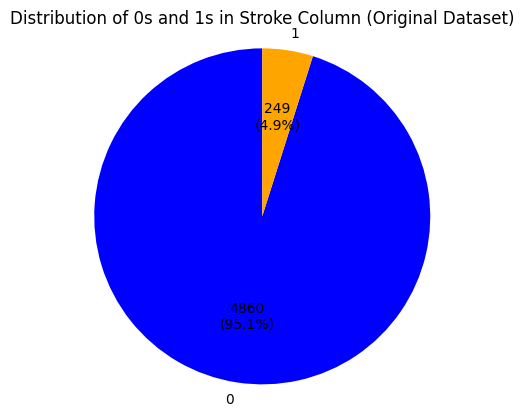

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of '0' and '1' in the 'stroke' column for the original dataset
original_stroke_counts = df_mean['stroke'].value_counts()

# Pie chart
plt.pie(original_stroke_counts, labels=original_stroke_counts.index.astype(str), autopct=lambda p: f'{int(p * len(df_mean) / 100)}\n({p:.1f}%)', colors=['blue', 'orange'], startangle=90)

plt.title('Distribution of 0s and 1s in Stroke Column (Original Dataset)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


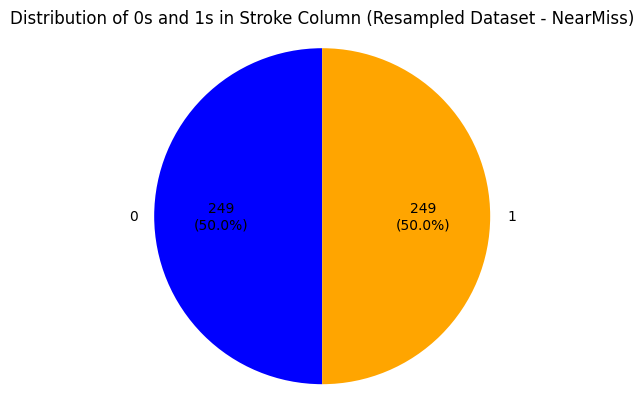

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of '0' and '1' in the 'stroke' column for the resampled dataset
resampled_stroke_counts = pd.Series(y_resampled_NearMiss).value_counts()

# Pie chart
plt.pie(resampled_stroke_counts, labels=resampled_stroke_counts.index.astype(str), autopct=lambda p: f'{int(p * len(y_resampled_NearMiss) / 100)}\n({p:.1f}%)', colors=['blue', 'orange'], startangle=90)

plt.title('Distribution of 0s and 1s in Stroke Column (Resampled Dataset - NearMiss)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_NearMiss,
                                                    y_resampled_NearMiss,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

knn_classifier = KNeighborsClassifier()
grid_search_and_fit(knn_classifier, knn_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)

Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 80.0
Mean precision score: 93.058
Mean recall score: 64.8
Mean F1 score: 76.136


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: 



Model results after hyperparameter tuning:

After 5 stratified cross-validated folds
Mean accuracy score: 75.2
Mean precision score: 87.721
Mean recall score: 58.4
Mean F1 score: 70.078


Best hyperparameters:
algorithm: auto
leaf_size: 10
metric: euclidean
n_jobs: -1
n_neighbors: 3


In [ ]:
np.random.seed(42)

svm_classifier = SVC(random_state=42)
grid_search_and_fit(svm_classifier, svm_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 84.4
Mean precision score: 87.974
Mean recall score: 80.0
Mean F1 score: 83.609


Model results after hyperparameter tuning:

After 5 stratified cross-validated folds
Mean accuracy score: 90.4
Mean precision score: 95.562
Mean recall score: 84.8
Mean F1 score: 89.654


Best hyperparameters:
C: 1.0
gamma: scale
kernel: poly
random_state: 42


In [ ]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

lr_classifier = LogisticRegression(random_state=42)
grid_search_and_fit(lr_classifier, lr_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 84.0
Mean precision score: 86.02
Mean recall score: 81.6
Mean F1 score: 83.657


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
c:\Users



Model results after hyperparameter tuning:

After 5 stratified cross-validated folds
Mean accuracy score: 86.8
Mean precision score: 88.93
Mean recall score: 84.0
Mean F1 score: 86.213


Best hyperparameters:
C: 1.0
max_iter: 300
n_jobs: -1
penalty: l1
random_state: 42
solver: saga


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

nb_classifier = GaussianNB()
grid_search_and_fit(nb_classifier, nb_param_grid, X_train.toarray(), y_train, X_test.toarray(), y_test, X_resampled_NearMiss.toarray(), y_resampled_NearMiss)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 62.0
Mean precision score: 72.333
Mean recall score: 38.4
Mean F1 score: 49.707


Model results after hyperparameter tuning:

After 5 stratified cross-validated folds
Mean accuracy score: 58.8
Mean precision score: 70.668
Mean recall score: 32.0
Mean F1 score: 43.084


Best hyperparameters:
priors: None


In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search_and_fit(dt_classifier, dt_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 84.4
Mean precision score: 84.817
Mean recall score: 84.0
Mean F1 score: 84.223


Model results after hyperparameter tuning:

After 5 stratified cross-validated folds
Mean accuracy score: 90.0
Mean precision score: 93.183
Mean recall score: 86.4
Mean F1 score: 89.469


Best hyperparameters:
criterion: gini
max_depth: 10
max_features: None
min_samples_leaf: 1
min_samples_split: 2
random_state: 42
splitter: random


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Pyt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_and_fit(rf_classifier, rf_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


Model results with default hyperparameters:

After 5 stratified cross-validated folds
Mean accuracy score: 88.4
Mean precision score: 91.469
Mean recall score: 84.8
Mean F1 score: 87.934


c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\Hussein Almansory\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. 

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(42)

et_classifier = ExtraTreesClassifier(random_state=42)
grid_search_and_fit(et_classifier, et_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(42)

ada_classifier = AdaBoostClassifier(random_state=42)
grid_search_and_fit(ada_classifier, ada_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from xgboost import XGBClassifier
np.random.seed(42)

xgb_classifier = XGBClassifier(random_state=42)
grid_search_and_fit(xgb_classifier, xgb_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


#### Ridge Regression

###### 1. RandomUnderSampler

In [ ]:
X = df_ridge.drop(["stroke", "id"], axis= 1)
y = df_ridge.stroke

le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X

for i in X_le.columns:
  if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
    X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform random under-sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_ohe, y)

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

knn_classifier = KNeighborsClassifier()
grid_search_and_fit(knn_classifier, knn_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)

In [ ]:
np.random.seed(42)

svm_classifier = SVC(random_state=42)
grid_search_and_fit(svm_classifier, svm_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

lr_classifier = LogisticRegression(random_state=42)
grid_search_and_fit(lr_classifier, lr_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

nb_classifier = GaussianNB()
grid_search_and_fit(nb_classifier, nb_param_grid, X_train.toarray(), y_train, X_test.toarray(), y_test, X_resampled.toarray(), y_resampled)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search_and_fit(dt_classifier, dt_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_and_fit(rf_classifier, rf_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(42)

et_classifier = ExtraTreesClassifier(random_state=42)
grid_search_and_fit(et_classifier, et_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(42)

ada_classifier = AdaBoostClassifier(random_state=42)
grid_search_and_fit(ada_classifier, ada_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from xgboost import XGBClassifier
np.random.seed(42)

xgb_classifier = XGBClassifier(random_state=42)
grid_search_and_fit(xgb_classifier, xgb_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


##### 2. NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import pandas as pd

# Assuming df_mean is your DataFrame
X = df_mean.drop(["stroke", "id"], axis=1)
y = df_mean.stroke

le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X.copy()  # Make a copy of X to avoid modifying the original DataFrame

# Label encode categorical columns
for i in X_le.columns:
    if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
        X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X_le)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform under-sampling using NearMiss
nm = NearMiss(sampling_strategy='auto', version=2)
X_resampled_NearMiss, y_resampled_NearMiss = nm.fit_resample(X_ohe, y)


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of '0' and '1' in the 'stroke' column for the original dataset
original_stroke_counts = df_mean['stroke'].value_counts()

# Pie chart
plt.pie(original_stroke_counts, labels=original_stroke_counts.index.astype(str), autopct=lambda p: f'{int(p * len(df_mean) / 100)}\n({p:.1f}%)', colors=['blue', 'orange'], startangle=90)

plt.title('Distribution of 0s and 1s in Stroke Column (Original Dataset)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of '0' and '1' in the 'stroke' column for the resampled dataset
resampled_stroke_counts = pd.Series(y_resampled_NearMiss).value_counts()

# Pie chart
plt.pie(resampled_stroke_counts, labels=resampled_stroke_counts.index.astype(str), autopct=lambda p: f'{int(p * len(y_resampled_NearMiss) / 100)}\n({p:.1f}%)', colors=['blue', 'orange'], startangle=90)

plt.title('Distribution of 0s and 1s in Stroke Column (Resampled Dataset - NearMiss)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_NearMiss,
                                                    y_resampled_NearMiss,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

knn_classifier = KNeighborsClassifier()
grid_search_and_fit(knn_classifier, knn_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)

In [ ]:
np.random.seed(42)

svm_classifier = SVC(random_state=42)
grid_search_and_fit(svm_classifier, svm_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

lr_classifier = LogisticRegression(random_state=42)
grid_search_and_fit(lr_classifier, lr_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

nb_classifier = GaussianNB()
grid_search_and_fit(nb_classifier, nb_param_grid, X_train.toarray(), y_train, X_test.toarray(), y_test, X_resampled_NearMiss.toarray(), y_resampled_NearMiss)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search_and_fit(dt_classifier, dt_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_and_fit(rf_classifier, rf_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(42)

et_classifier = ExtraTreesClassifier(random_state=42)
grid_search_and_fit(et_classifier, et_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(42)

ada_classifier = AdaBoostClassifier(random_state=42)
grid_search_and_fit(ada_classifier, ada_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from xgboost import XGBClassifier
np.random.seed(42)

xgb_classifier = XGBClassifier(random_state=42)
grid_search_and_fit(xgb_classifier, xgb_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


#### Median

##### 1. RandomUnderSampler

In [ ]:
X = df_median.drop(["stroke", "id"], axis= 1)
y = df_median.stroke

le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X

for i in X_le.columns:
  if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
    X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform random under-sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_ohe, y)

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

knn_classifier = KNeighborsClassifier()
grid_search_and_fit(knn_classifier, knn_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)

In [ ]:
np.random.seed(42)

svm_classifier = SVC(random_state=42)
grid_search_and_fit(svm_classifier, svm_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

lr_classifier = LogisticRegression(random_state=42)
grid_search_and_fit(lr_classifier, lr_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

nb_classifier = GaussianNB()
grid_search_and_fit(nb_classifier, nb_param_grid, X_train.toarray(), y_train, X_test.toarray(), y_test, X_resampled.toarray(), y_resampled)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search_and_fit(dt_classifier, dt_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_and_fit(rf_classifier, rf_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(42)

et_classifier = ExtraTreesClassifier(random_state=42)
grid_search_and_fit(et_classifier, et_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(42)

ada_classifier = AdaBoostClassifier(random_state=42)
grid_search_and_fit(ada_classifier, ada_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from xgboost import XGBClassifier
np.random.seed(42)

xgb_classifier = XGBClassifier(random_state=42)
grid_search_and_fit(xgb_classifier, xgb_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


##### 2. NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import pandas as pd

# Assuming df_mean is your DataFrame
X = df_mean.drop(["stroke", "id"], axis=1)
y = df_mean.stroke

le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X.copy()  # Make a copy of X to avoid modifying the original DataFrame

# Label encode categorical columns
for i in X_le.columns:
    if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
        X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X_le)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform under-sampling using NearMiss
nm = NearMiss(sampling_strategy='auto', version=2)
X_resampled_NearMiss, y_resampled_NearMiss = nm.fit_resample(X_ohe, y)


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of '0' and '1' in the 'stroke' column for the original dataset
original_stroke_counts = df_mean['stroke'].value_counts()

# Pie chart
plt.pie(original_stroke_counts, labels=original_stroke_counts.index.astype(str), autopct=lambda p: f'{int(p * len(df_mean) / 100)}\n({p:.1f}%)', colors=['blue', 'orange'], startangle=90)

plt.title('Distribution of 0s and 1s in Stroke Column (Original Dataset)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of '0' and '1' in the 'stroke' column for the resampled dataset
resampled_stroke_counts = pd.Series(y_resampled_NearMiss).value_counts()

# Pie chart
plt.pie(resampled_stroke_counts, labels=resampled_stroke_counts.index.astype(str), autopct=lambda p: f'{int(p * len(y_resampled_NearMiss) / 100)}\n({p:.1f}%)', colors=['blue', 'orange'], startangle=90)

plt.title('Distribution of 0s and 1s in Stroke Column (Resampled Dataset - NearMiss)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_NearMiss,
                                                    y_resampled_NearMiss,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

knn_classifier = KNeighborsClassifier()
grid_search_and_fit(knn_classifier, knn_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)

In [ ]:
np.random.seed(42)

svm_classifier = SVC(random_state=42)
grid_search_and_fit(svm_classifier, svm_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

lr_classifier = LogisticRegression(random_state=42)
grid_search_and_fit(lr_classifier, lr_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

nb_classifier = GaussianNB()
grid_search_and_fit(nb_classifier, nb_param_grid, X_train.toarray(), y_train, X_test.toarray(), y_test, X_resampled_NearMiss.toarray(), y_resampled_NearMiss)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search_and_fit(dt_classifier, dt_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_and_fit(rf_classifier, rf_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(42)

et_classifier = ExtraTreesClassifier(random_state=42)
grid_search_and_fit(et_classifier, et_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(42)

ada_classifier = AdaBoostClassifier(random_state=42)
grid_search_and_fit(ada_classifier, ada_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from xgboost import XGBClassifier
np.random.seed(42)

xgb_classifier = XGBClassifier(random_state=42)
grid_search_and_fit(xgb_classifier, xgb_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


### Mode

#### 1. RandomUnderSampler

In [ ]:
X = df_mode.drop(["stroke", "id"], axis= 1)
y = df_mode.stroke

le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X

for i in X_le.columns:
  if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
    X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform random under-sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_ohe, y)

In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

knn_classifier = KNeighborsClassifier()
grid_search_and_fit(knn_classifier, knn_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)

In [ ]:
np.random.seed(42)

svm_classifier = SVC(random_state=42)
grid_search_and_fit(svm_classifier, svm_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

lr_classifier = LogisticRegression(random_state=42)
grid_search_and_fit(lr_classifier, lr_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

nb_classifier = GaussianNB()
grid_search_and_fit(nb_classifier, nb_param_grid, X_train.toarray(), y_train, X_test.toarray(), y_test, X_resampled.toarray(), y_resampled)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search_and_fit(dt_classifier, dt_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_and_fit(rf_classifier, rf_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(42)

et_classifier = ExtraTreesClassifier(random_state=42)
grid_search_and_fit(et_classifier, et_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(42)

ada_classifier = AdaBoostClassifier(random_state=42)
grid_search_and_fit(ada_classifier, ada_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


In [ ]:
from xgboost import XGBClassifier
np.random.seed(42)

xgb_classifier = XGBClassifier(random_state=42)
grid_search_and_fit(xgb_classifier, xgb_param_grid, X_train, y_train, X_test, y_test, X_resampled, y_resampled)


##### 2. NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import pandas as pd

# Assuming df_mean is your DataFrame
X = df_mean.drop(["stroke", "id"], axis=1)
y = df_mean.stroke

le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X.copy()  # Make a copy of X to avoid modifying the original DataFrame

# Label encode categorical columns
for i in X_le.columns:
    if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
        X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X_le)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform under-sampling using NearMiss
nm = NearMiss(sampling_strategy='auto', version=2)
X_resampled_NearMiss, y_resampled_NearMiss = nm.fit_resample(X_ohe, y)


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of '0' and '1' in the 'stroke' column for the original dataset
original_stroke_counts = df_mean['stroke'].value_counts()

# Pie chart
plt.pie(original_stroke_counts, labels=original_stroke_counts.index.astype(str), autopct=lambda p: f'{int(p * len(df_mean) / 100)}\n({p:.1f}%)', colors=['blue', 'orange'], startangle=90)

plt.title('Distribution of 0s and 1s in Stroke Column (Original Dataset)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of '0' and '1' in the 'stroke' column for the resampled dataset
resampled_stroke_counts = pd.Series(y_resampled_NearMiss).value_counts()

# Pie chart
plt.pie(resampled_stroke_counts, labels=resampled_stroke_counts.index.astype(str), autopct=lambda p: f'{int(p * len(y_resampled_NearMiss) / 100)}\n({p:.1f}%)', colors=['blue', 'orange'], startangle=90)

plt.title('Distribution of 0s and 1s in Stroke Column (Resampled Dataset - NearMiss)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_NearMiss,
                                                    y_resampled_NearMiss,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)

knn_classifier = KNeighborsClassifier()
grid_search_and_fit(knn_classifier, knn_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)

In [ ]:
np.random.seed(42)

svm_classifier = SVC(random_state=42)
grid_search_and_fit(svm_classifier, svm_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.linear_model import LogisticRegression
np.random.seed(42)

lr_classifier = LogisticRegression(random_state=42)
grid_search_and_fit(lr_classifier, lr_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.naive_bayes import GaussianNB
np.random.seed(42)

nb_classifier = GaussianNB()
grid_search_and_fit(nb_classifier, nb_param_grid, X_train.toarray(), y_train, X_test.toarray(), y_test, X_resampled_NearMiss.toarray(), y_resampled_NearMiss)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(42)

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search_and_fit(dt_classifier, dt_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_and_fit(rf_classifier, rf_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
np.random.seed(42)

et_classifier = ExtraTreesClassifier(random_state=42)
grid_search_and_fit(et_classifier, et_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
np.random.seed(42)

ada_classifier = AdaBoostClassifier(random_state=42)
grid_search_and_fit(ada_classifier, ada_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


In [ ]:
from xgboost import XGBClassifier
np.random.seed(42)

xgb_classifier = XGBClassifier(random_state=42)
grid_search_and_fit(xgb_classifier, xgb_param_grid, X_train, y_train, X_test, y_test, X_resampled_NearMiss, y_resampled_NearMiss)


# Feature selection

Section requirements:
1. Use all feature selection algorithms to find best features
2. Show the results before and after feature selection

### Feature selection with [Ridge]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import (
    AdaBoostClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

X = df_ridge.drop(["stroke", "id"], axis=1)
y = df_ridge.stroke
# Label encoding for categorical features
X_le = X.copy()
for col in X_le.columns:
    if X_le[col].dtypes == "object" or X_le[col].dtypes == "category":
        X_le[col] = le.fit_transform(X_le[col])

# Normalize features
X_s = scaler.fit_transform(X_le)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform random under-sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_ohe, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Define the number of features to select (you can adjust this value)
num_features = 10

# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=num_features)

# Convert sparse matrices to dense arrays before applying feature selection
X_train_dense = selector.fit_transform(X_train.toarray(), y_train)
X_test_dense = selector.transform(X_test.toarray())


classifiers = {
    "kNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "LR": LogisticRegression(),
    "NB": GaussianNB(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "ET": ExtraTreesClassifier(),
    "ADA": AdaBoostClassifier(),
    "HGB": GradientBoostingClassifier(),
    "XGB": XGBClassifier()
}


# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier on the selected features
    clf.fit(X_train_dense, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_dense)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print results
    print(f"{clf_name} Results after Feature Selection:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("=" * 30)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   2    4    5 ... 4394 4395 4396] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


kNN Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
SVM Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
LR Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
NB Results after Feature Selection:
Accuracy: 0.7143
Recall: 1.0000
Precision: 0.6364
F1 Score: 0.7778
DT Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
RF Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
ET Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
ADA Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
HGB Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
XGB Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000


# Performance measurements

Section requirements:
1. Show models performance using 6 metrics: accuracy, precision, recall, f1-score, roc-curve, confusion matrix
2. compare the results using meaningful visuals

## Oversampling

### Confusion matrices

In [ ]:
# Best results

# Smote walkthrough
X = df_ridge.drop(["stroke", "id"], axis= 1)
y = df_ridge.stroke
le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X

for i in X_le.columns:
  if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
    X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform SMOTE
X_r, y_r = ros.fit_resample(X_ohe, y)

X_train, X_test, y_train, y_test = train_test_split(X_r,
                                                    y_r,
                                                    test_size= 0.1,
                                                    stratify= y_r,
                                                    random_state= 42)

In [ ]:
# ET CM

np.random.seed(42)
from sklearn.ensemble import ExtraTreesClassifier

# ET
# Getting the model ready
clf_et = ExtraTreesClassifier(criterion= "entropy",
                                         max_depth= None,
                                         max_features= "sqrt",
                                         min_samples_leaf= 1,
                                         min_samples_split= 2,
                                         n_estimators= 100,
                                         random_state= 42,
                                         n_jobs= -1)
# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
clf_et.fit(X_train, y_train)
y_pred = clf_et.predict(X_test)


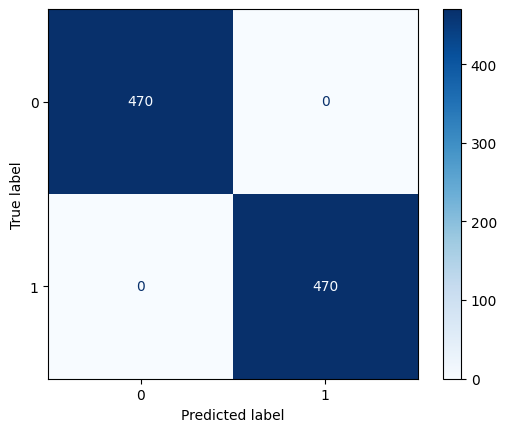

In [ ]:

cm(clf_et,
   y_test,
   y_pred)

In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# RF
# Getting the model ready
clf_rf = RandomForestClassifier(criterion= "entropy",
                                           max_depth= None,
                                           max_features= "auto",
                                           min_samples_leaf= 1,
                                           min_samples_split= 2,
                                           n_estimators= 50,
                                           random_state= 42,
                                           n_jobs= -1)

# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 42}

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


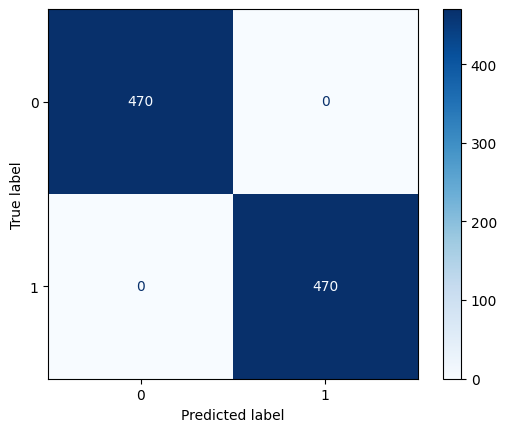

In [ ]:
cm(clf_rf,
   y_test,
   y_pred)

In [ ]:
np.random.seed(42)
from sklearn.ensemble import AdaBoostClassifier

# Adaboost
# Getting the model ready
clf_ada = AdaBoostClassifier(algorithm= "SAMME.R",
                                        learning_rate= 1.0,
                                        n_estimators= 100,
                                        random_state= 42)


# {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 42}

clf_ada.fit(X_train, y_train)
y_pred = clf_ada.predict(X_test)

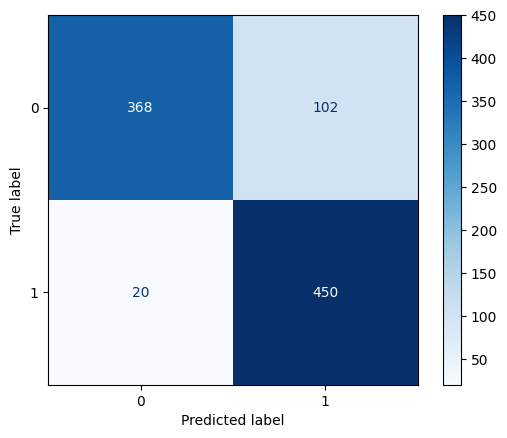

In [ ]:
cm(clf_ada,
   y_test,
   y_pred)

In [ ]:
np.random.seed(42)
from xgboost import XGBClassifier

# Xgboost
# Getting the model ready
clf_xgb = XGBClassifier(colsample_bytree= 1,
                                   device= "cuda",
                                   gamma= 0,
                                   max_depth= 15,
                                   min_child_weight= 1,
                                   subsample= 1,
                                   random_state= 42)

# {'colsample_bytree': 1, 'device': 'cuda', 'gamma': 0, 'max_depth': 15, 'min_child_weight': 1, 'subsample': 1}


clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:12:05] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


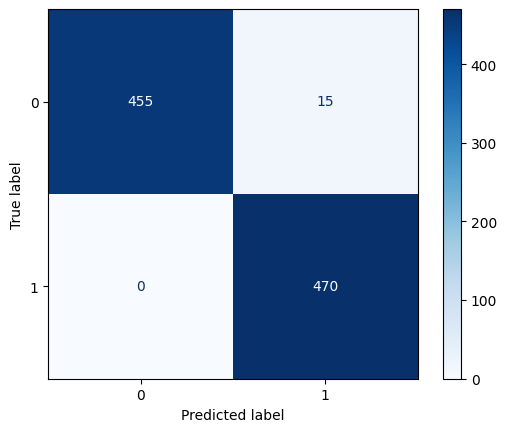

In [ ]:
cm(clf_xgb,
   y_test,
   y_pred)

In [ ]:
np.random.seed(42)
#KNN
# Getting the model ready

clf_knn = KNeighborsClassifier(algorithm= "auto",
                                               leaf_size= 10,
                                               metric= "euclidean",
                                               n_jobs= -1,
                                               n_neighbors= 1)

clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)

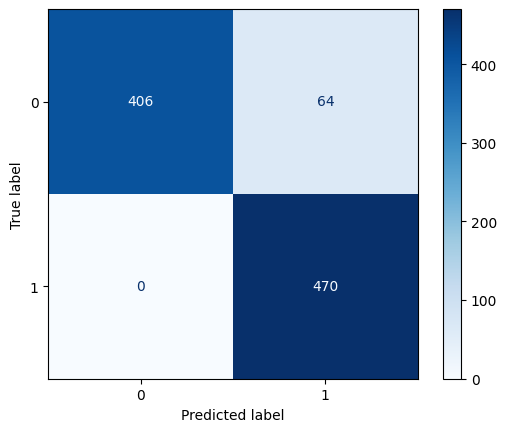

In [ ]:
cm(clf_knn,
   y_test,
   y_pred)

In [ ]:
np.random.seed(42)
# SVM
# Getting the model ready
clf_svm = SVC(random_state= 42,
              C= 1.0,
              gamma= "scale",
              kernel= "poly",
              probability= True)

# {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}

clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)

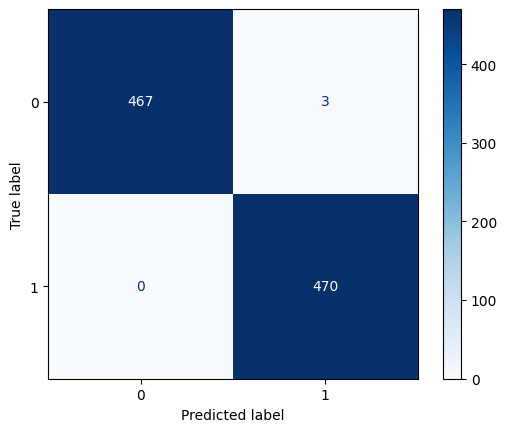

In [ ]:
cm(clf_svm,
   y_test,
   y_pred)

In [ ]:
np.random.seed(42)
# LR
# Getting the model ready
clf_lr = LogisticRegression(random_state= 42,
                                            C= 1.0,
                                            max_iter= 100,
                                            n_jobs= -1,
                                            penalty= "l1",
                                            solver= "liblinear")

# {'C': 1.0, 'max_iter': 200, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}

clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


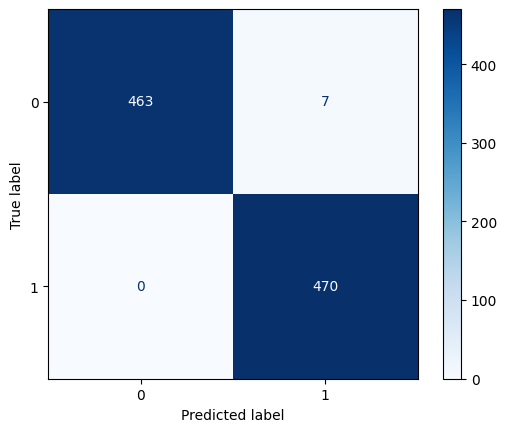

In [ ]:
cm(clf_lr,
   y_test,
   y_pred)

In [ ]:
np.random.seed(42)
# NB
# Getting the model ready
clf_nb = GaussianNB(priors= None)

# {'priors': None}

clf_nb.fit(X_train.toarray(), y_train)
y_pred = clf_nb.predict(X_test.toarray())

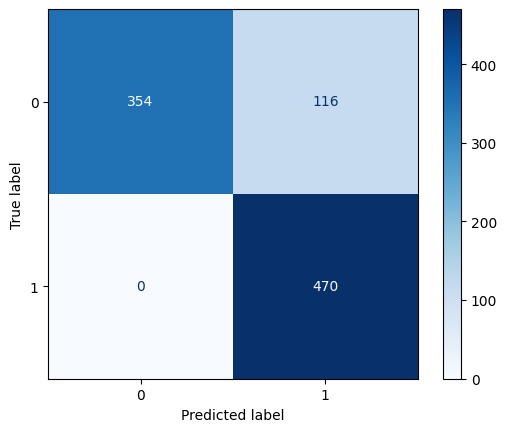

In [ ]:
cm(clf_nb,
   y_test,
   y_pred)

In [ ]:
np.random.seed(42)
# DT
from sklearn.tree import DecisionTreeClassifier

# Getting the model ready
clf_dt = DecisionTreeClassifier(criterion= "gini",
                                                 max_depth= None,
                                                 max_features= None,
                                                 min_samples_leaf= 3,
                                                 min_samples_split= 2,
                                                 random_state= 42,
                                                 splitter= "best")

# {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}

clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)

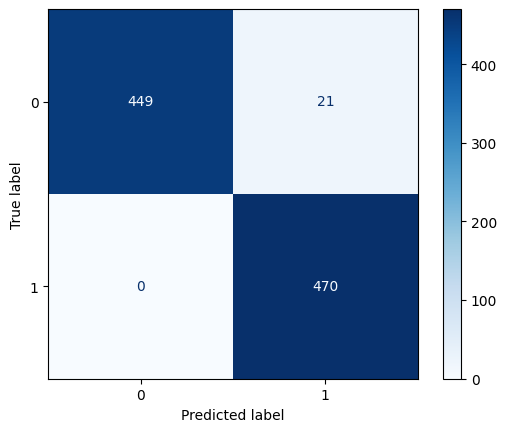

In [ ]:
cm(clf_dt,
   y_test,
   y_pred)

In [ ]:
np.random.seed(42)

# Ensemble method

from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier

# Advanced learners
voting_clf = VotingClassifier(
    estimators=[
        ('et', clf_et),
        ('rf', clf_rf),
        ('ada', clf_ada),
        ('xgb', clf_xgb)
    ],
    voting='soft'
)

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
stratified_cv(voting_clf,
              X_r,
              y_r,
              n_folds= 3)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:12:36] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:12:51] WARNING:


After 3 stratified cross validated folds
Mean accuracy score: 99.681
Mean precision score: 99.367
Mean recall score: 100.0
Mean f1 score: 99.682


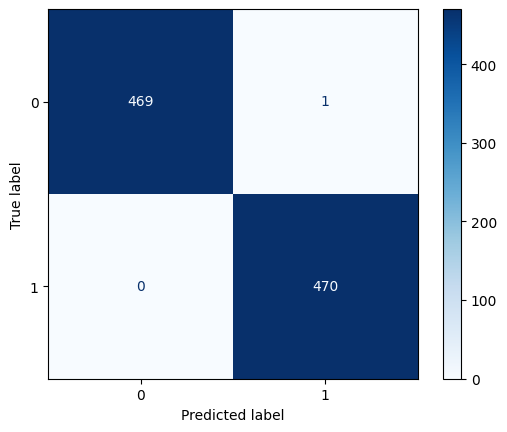

In [ ]:
cm(voting_clf,
   y_test,
   y_pred)

In [ ]:
np.random.seed(42)

# Ensemble method

from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier

# Advanced learners
voting_clf_lazy = VotingClassifier(
    estimators=[
        ('knn', clf_knn),
        ('svm', clf_svm),
        ('lr', clf_lr),
        ('nb', clf_nb),
        ('dt', clf_dt)
    ],
    voting='hard'
)

# Train the VotingClassifier
voting_clf_lazy.fit(X_train.toarray(), y_train)
y_pred = voting_clf_lazy.predict(X_test.toarray())
stratified_cv(voting_clf_lazy,
              X_r.toarray(),
              y_r,
              n_folds= 3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(



After 3 stratified cross validated folds
Mean accuracy score: 99.149
Mean precision score: 98.327
Mean recall score: 100.0
Mean f1 score: 99.156


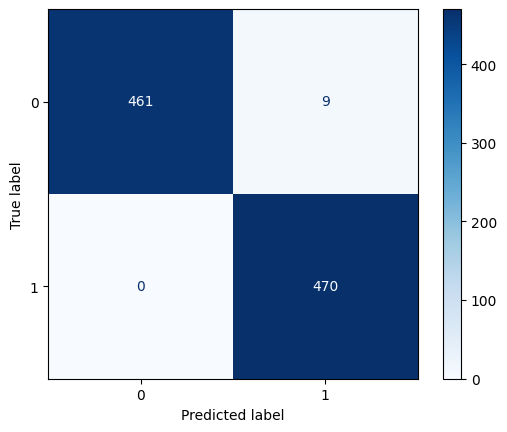

In [ ]:
cm(voting_clf_lazy,
   y_test,
   y_pred)

In [ ]:
# Advanced learners
voting_clf_lazy = VotingClassifier(
    estimators=[
        ('knn', clf_knn),
        ('svm', clf_svm),
        ('lr', clf_lr),
        ('nb', clf_nb),
        ('dt', clf_dt)
    ],
    voting='soft'
)

# Train the VotingClassifier
voting_clf_lazy.fit(X_train.toarray(), y_train)
y_pred = voting_clf_lazy.predict(X_test.toarray())
stratified_cv(voting_clf_lazy,
              X_r.toarray(),
              y_r,
              n_folds= 3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(



After 3 stratified cross validated folds
Mean accuracy score: 99.397
Mean precision score: 98.81
Mean recall score: 100.0
Mean f1 score: 99.401


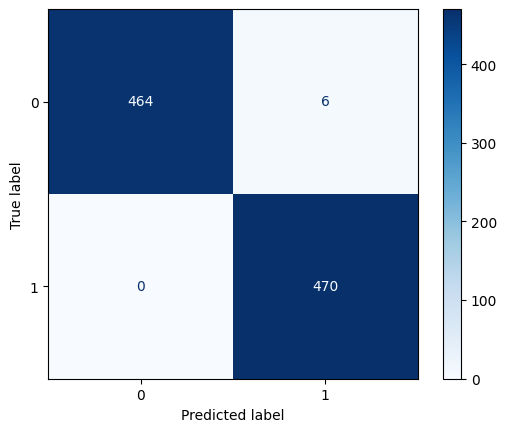

In [ ]:
cm(voting_clf_lazy,
   y_test,
   y_pred)

### Roc curves

#### Lazy learners

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


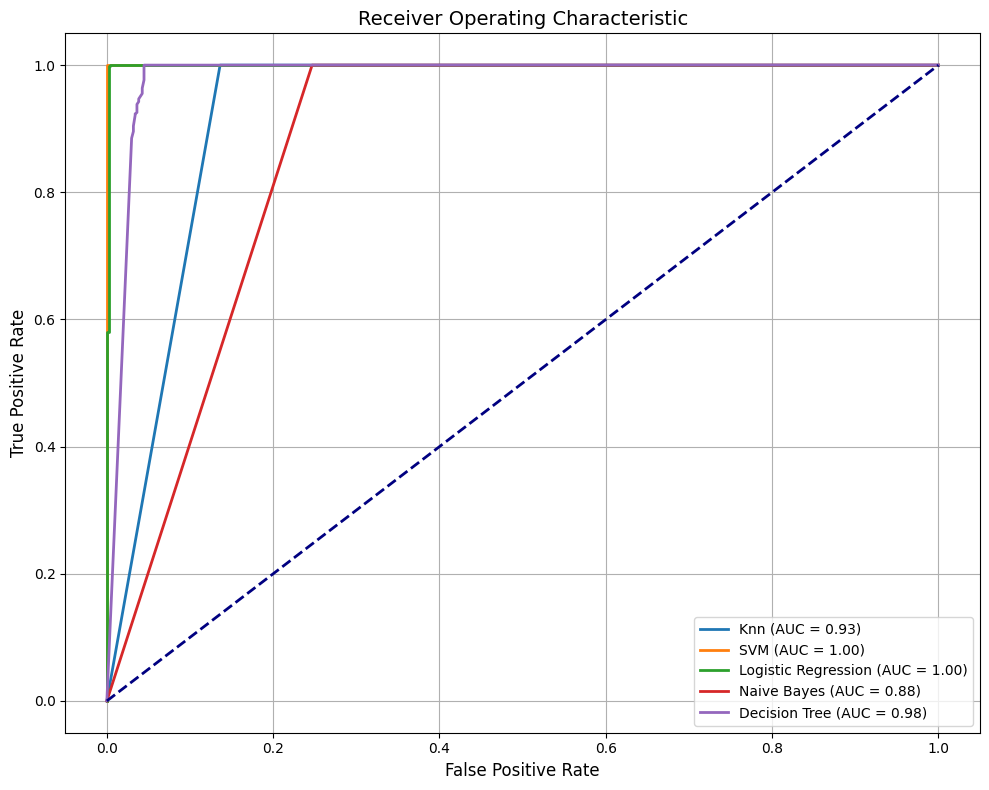

In [ ]:
labelss = ["Knn", "SVM", "Logistic Regression", "Naive Bayes", "Decision Tree"]
classifierss = [clf_knn, clf_svm, clf_lr, clf_nb, clf_dt]


plot_roc_curves(classifierss, X_train.toarray(), X_test.toarray(), y_train, y_test, labels=labelss)


#### Advanced learners

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:59:27] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


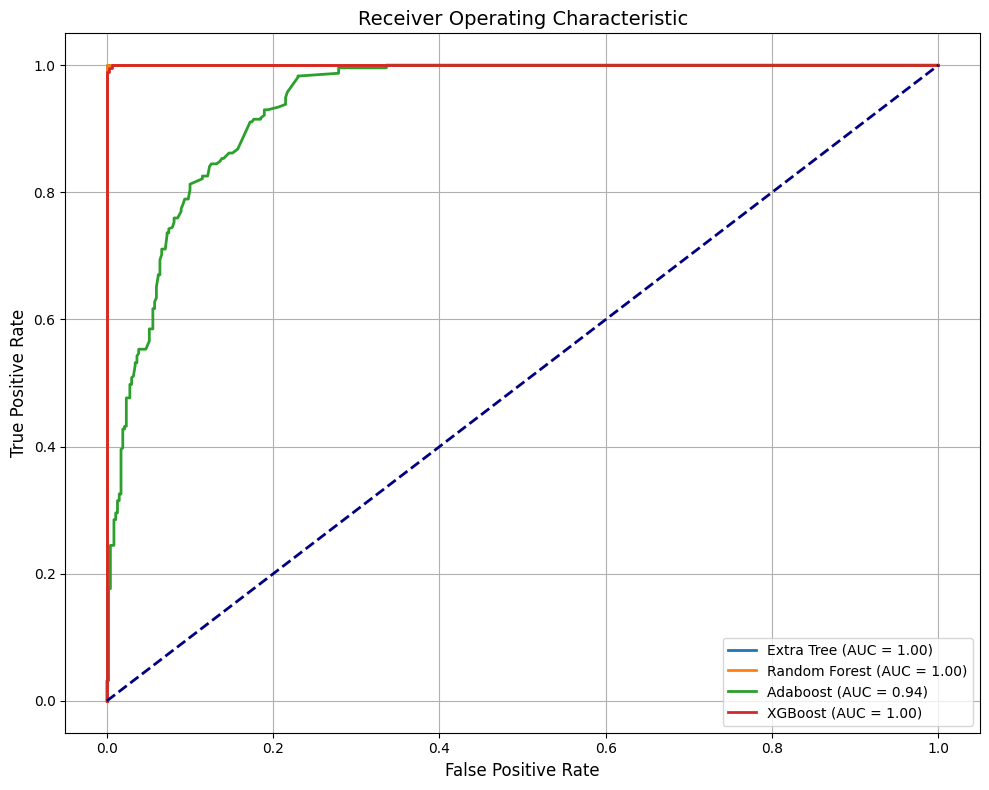

In [ ]:
labels = ["Extra Tree", "Random Forest", "Adaboost", "XGBoost"]
classifiers = [clf_et, clf_rf, clf_ada, clf_xgb]

plot_roc_curves(classifiers, X_train, X_test, y_train, y_test, labels)

### Feature selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import (
    AdaBoostClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

X = df_ridge.drop(["stroke", "id"], axis=1)
y = df_ridge.stroke
# Label encoding for categorical features
X_le = X.copy()
for col in X_le.columns:
    if X_le[col].dtypes == "object" or X_le[col].dtypes == "category":
        X_le[col] = le.fit_transform(X_le[col])

# Normalize features
X_s = scaler.fit_transform(X_le)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform random under-sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_ohe, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Define the number of features to select (you can adjust this value)
num_features = 10

# Feature selection using SelectKBest
selector = SelectKBest(f_classif, k=num_features)

# Convert sparse matrices to dense arrays before applying feature selection
X_train_dense = selector.fit_transform(X_train.toarray(), y_train)
X_test_dense = selector.transform(X_test.toarray())


classifiers = {
    "kNN": clf_knn,
    "SVM": clf_svm,
    "LR": clf_lr,
    "NB": clf_nb,
    "DT": clf_dt,
    "RF": clf_rf,
    "ET": clf_et,
    "ADA": clf_ada,
    "XGB": clf_xgb
}


# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier on the selected features
    clf.fit(X_train_dense, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test_dense)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print results
    print(f"{clf_name} Results after Feature Selection:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("=" * 30)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   2    4    5 ... 4394 4395 4396] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


kNN Results after Feature Selection:
Accuracy: 0.5357
Recall: 0.7381
Precision: 0.5254
F1 Score: 0.6139
SVM Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
LR Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
NB Results after Feature Selection:
Accuracy: 0.7143
Recall: 1.0000
Precision: 0.6364
F1 Score: 0.7778
DT Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
RF Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
ET Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
ADA Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571
XGB Results after Feature Selection:
Accuracy: 0.8333
Recall: 1.0000
Precision: 0.7500
F1 Score: 0.8571


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:05:29] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


## Undersampling

### Confusion Matrices - [RandomUnderSampler]

In [ ]:
X = df_ridge.drop(["stroke", "id"], axis= 1)
y = df_ridge.stroke

le = LabelEncoder()
scaler = MinMaxScaler()
ohe = OneHotEncoder()

X_le = X

for i in X_le.columns:
  if X_le[i].dtypes == "object" or X_le[i].dtypes == "category":
    X_le[i] = le.fit_transform(X_le[i])

# Normalize features
X_s = scaler.fit_transform(X)

# One hot encode the features
X_ohe = ohe.fit_transform(X_s)

# Perform random under-sampling using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_ohe, y)


In [ ]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                    y_resampled,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# ET CM

np.random.seed(42)
from sklearn.ensemble import ExtraTreesClassifier

# ET
# Getting the model ready
clf_et = ExtraTreesClassifier(criterion= "entropy",
                                         max_depth= None,
                                         max_features= "sqrt",
                                         min_samples_leaf= 1,
                                         min_samples_split= 2,
                                         n_estimators= 100,
                                         random_state= 42,
                                         n_jobs= -1)
# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 42}
clf_et.fit(X_train, y_train)
y_pred = clf_et.predict(X_test)


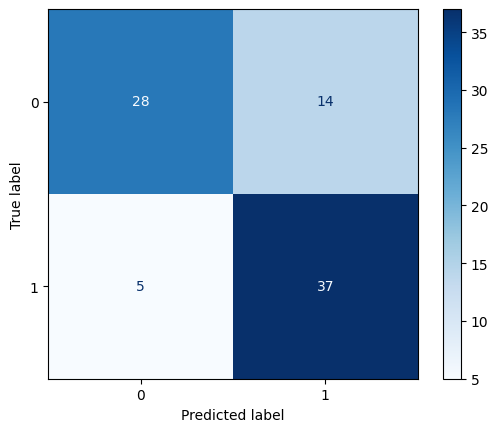

In [ ]:
cm(clf_et,
   y_test,
   y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


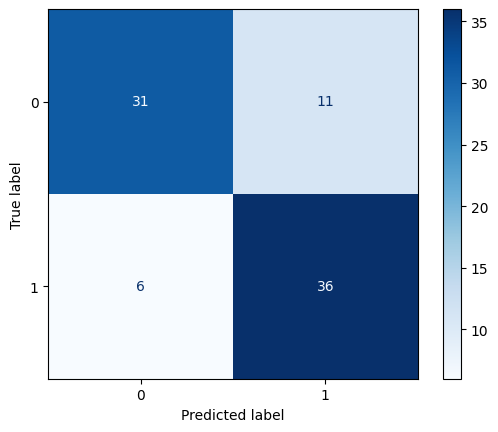

In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# RF
# Getting the model ready
clf_rf = RandomForestClassifier(criterion= "entropy",
                                           max_depth= None,
                                           max_features= "auto",
                                           min_samples_leaf= 1,
                                           min_samples_split= 2,
                                           n_estimators= 50,
                                           random_state= 42,
                                           n_jobs= -1)

# {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 42}

clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

cm(clf_rf,
   y_test,
   y_pred)

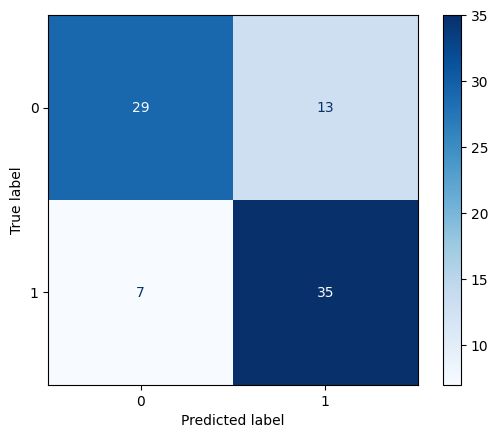

In [ ]:
np.random.seed(42)
from sklearn.ensemble import AdaBoostClassifier

# Adaboost
# Getting the model ready
clf_ada = AdaBoostClassifier(algorithm= "SAMME.R",
                                        learning_rate= 1.0,
                                        n_estimators= 100,
                                        random_state= 42)


# {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': 42}

clf_ada.fit(X_train, y_train)
y_pred = clf_ada.predict(X_test)
cm(clf_ada,
   y_test,
   y_pred)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:05:31] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


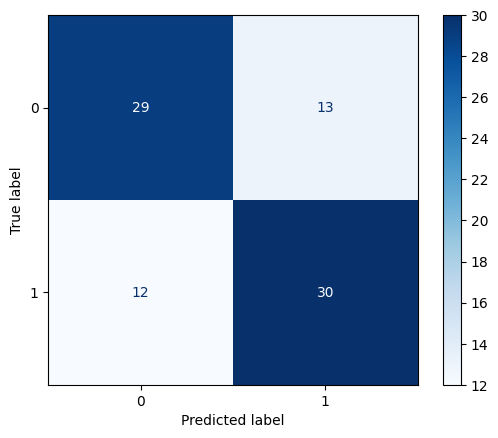

In [ ]:
np.random.seed(42)
from xgboost import XGBClassifier

# Xgboost
# Getting the model ready
clf_xgb = XGBClassifier(colsample_bytree= 1,
                                   device= "cuda",
                                   gamma= 0,
                                   max_depth= 15,
                                   min_child_weight= 1,
                                   subsample= 1,
                                   random_state= 42)

# {'colsample_bytree': 1, 'device': 'cuda', 'gamma': 0, 'max_depth': 15, 'min_child_weight': 1, 'subsample': 1}


clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)
cm(clf_xgb,
   y_test,
   y_pred)

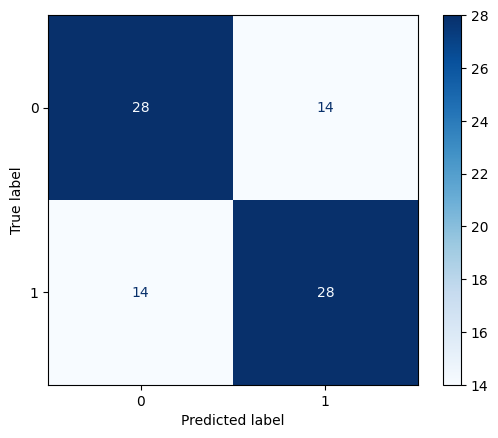

In [ ]:
np.random.seed(42)
#KNN
# Getting the model ready

clf_knn = KNeighborsClassifier(algorithm= "auto",
                                               leaf_size= 10,
                                               metric= "euclidean",
                                               n_jobs= -1,
                                               n_neighbors= 1)

clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
cm(clf_knn,
   y_test,
   y_pred)

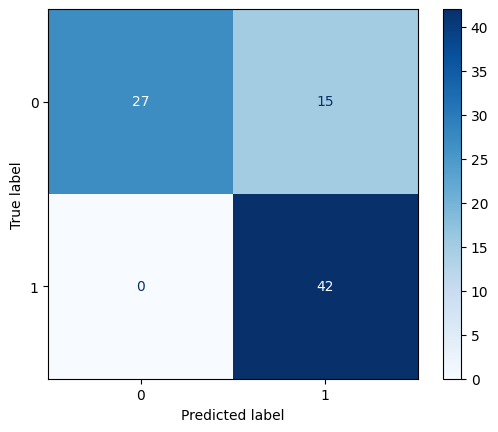

In [ ]:
np.random.seed(42)
# SVM
# Getting the model ready
clf_svm = SVC(random_state= 42,
              C= 1.0,
              gamma= "scale",
              kernel= "poly",
              probability= True)

# {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 42}

clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
cm(clf_svm,
   y_test,
   y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


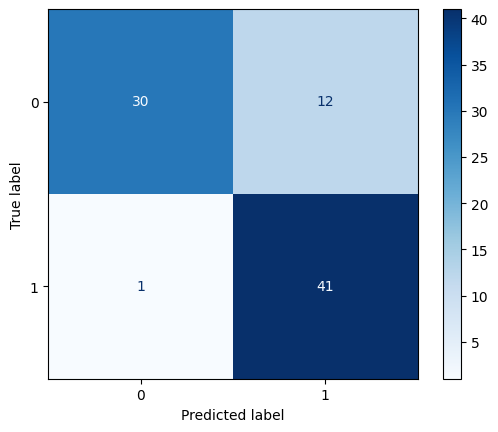

In [ ]:
np.random.seed(42)
# LR
# Getting the model ready
clf_lr = LogisticRegression(random_state= 42,
                                            C= 1.0,
                                            max_iter= 100,
                                            n_jobs= -1,
                                            penalty= "l1",
                                            solver= "liblinear")

# {'C': 1.0, 'max_iter': 200, 'n_jobs': -1, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga'}

clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
cm(clf_lr,
   y_test,
   y_pred)

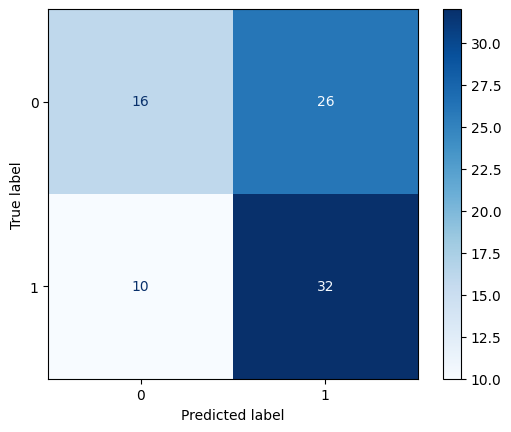

In [ ]:
np.random.seed(42)
# NB
# Getting the model ready
clf_nb = GaussianNB(priors= None)

# {'priors': None}

clf_nb.fit(X_train.toarray(), y_train)
y_pred = clf_nb.predict(X_test.toarray())
cm(clf_nb,
   y_test,
   y_pred)

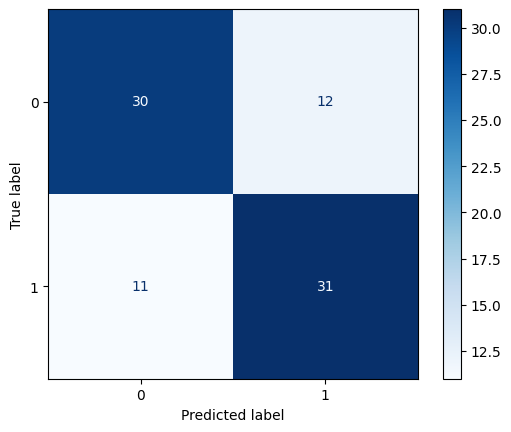

In [ ]:
np.random.seed(42)
# DT
from sklearn.tree import DecisionTreeClassifier

# Getting the model ready
clf_dt = DecisionTreeClassifier(criterion= "gini",
                                                 max_depth= None,
                                                 max_features= None,
                                                 min_samples_leaf= 3,
                                                 min_samples_split= 2,
                                                 random_state= 42,
                                                 splitter= "best")

# {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}

clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
cm(clf_dt,
   y_test,
   y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:05:35] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:05:39] WARNING:


After 3 stratified cross validated folds
Mean accuracy score: 64.286
Mean precision score: 62.43
Mean recall score: 71.429
Mean f1 score: 66.488


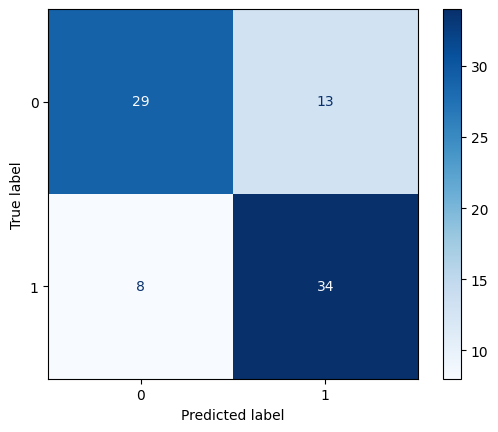

In [ ]:
np.random.seed(42)

# Ensemble method

from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier

# Advanced learners
voting_clf = VotingClassifier(
    estimators=[
        ('et', clf_et),
        ('rf', clf_rf),
        ('ada', clf_ada),
        ('xgb', clf_xgb)
    ],
    voting='soft'
)

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
stratified_cv(voting_clf,
              X_resampled,
              y_resampled,
              n_folds= 3)
cm(voting_clf,
   y_test,
   y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(



After 3 stratified cross validated folds
Mean accuracy score: 66.667
Mean precision score: 63.568
Mean recall score: 77.778
Mean f1 score: 69.917


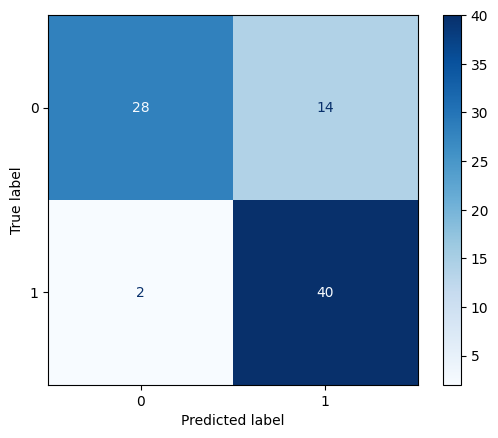

In [ ]:
np.random.seed(42)

# Ensemble method

from sklearn.ensemble import VotingClassifier, BaggingClassifier, StackingClassifier

# Advanced learners
voting_clf_lazy = VotingClassifier(
    estimators=[
        ('knn', clf_knn),
        ('svm', clf_svm),
        ('lr', clf_lr),
        ('nb', clf_nb),
        ('dt', clf_dt)
    ],
    voting='hard'
)

# Train the VotingClassifier
voting_clf_lazy.fit(X_train.toarray(), y_train)
y_pred = voting_clf_lazy.predict(X_test.toarray())
stratified_cv(voting_clf_lazy,
              X_resampled.toarray(),
              y_resampled,
              n_folds= 3)
cm(voting_clf_lazy,
   y_test,
   y_pred)

### ROC

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


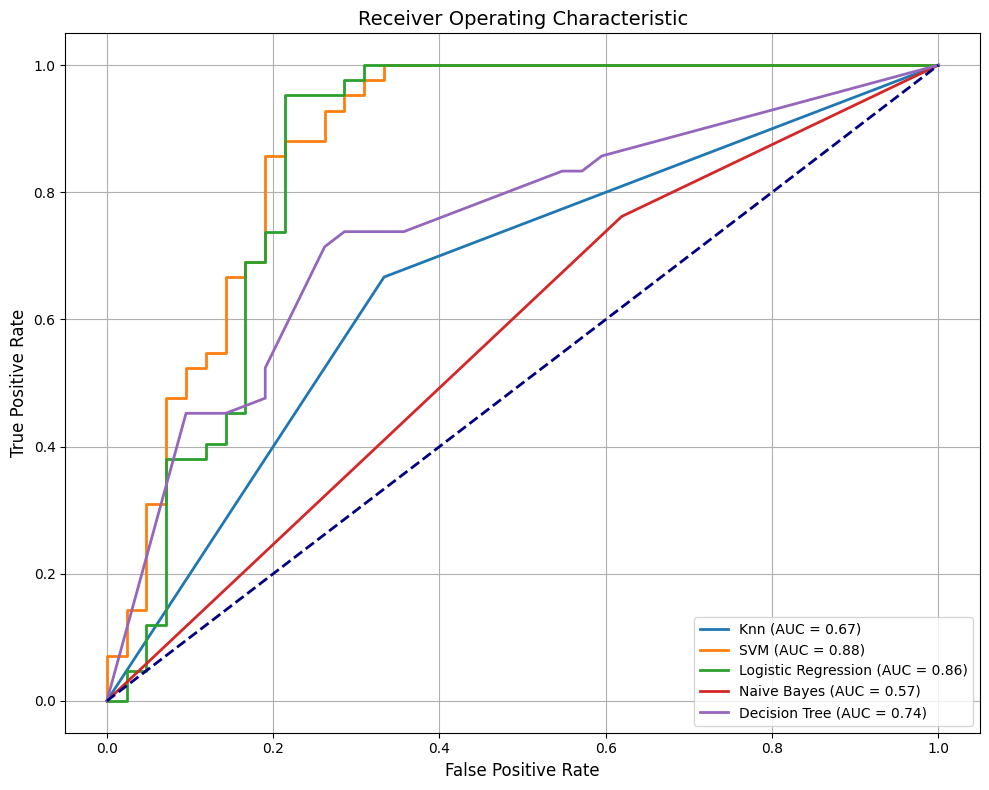

In [ ]:
labelss = ["Knn", "SVM", "Logistic Regression", "Naive Bayes", "Decision Tree"]
classifierss = [clf_knn, clf_svm, clf_lr, clf_nb, clf_dt]


plot_roc_curves(classifierss, X_train.toarray(), X_test.toarray(), y_train, y_test, labels=labelss)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:05:54] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


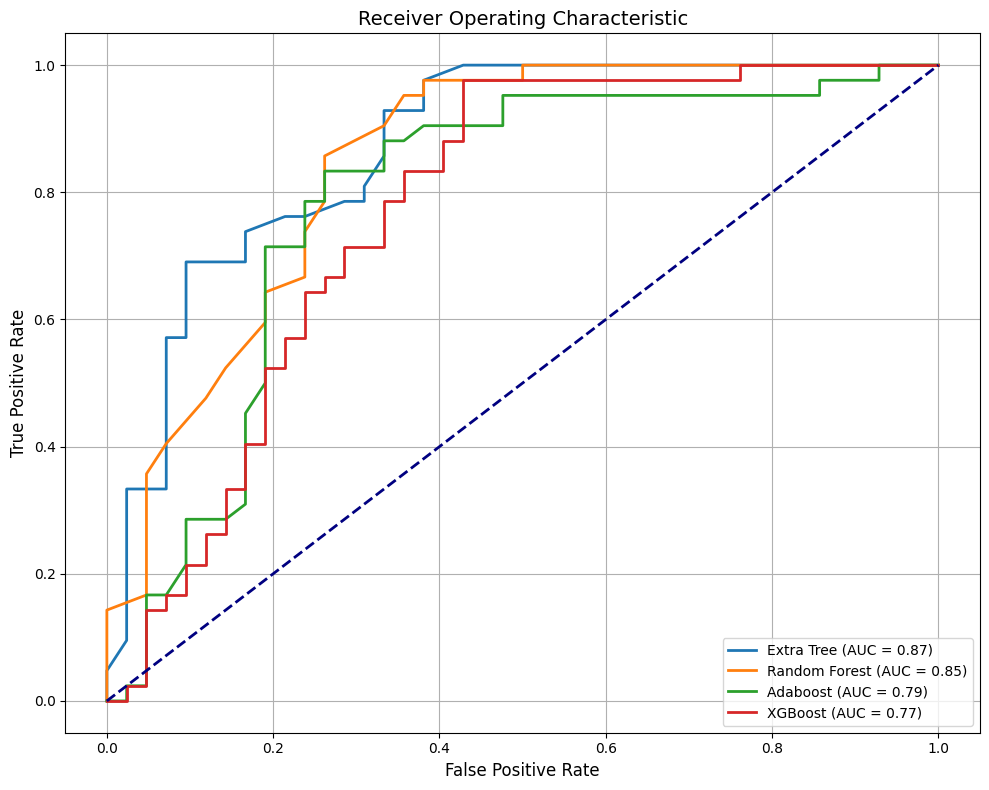

In [ ]:
labels = ["Extra Tree", "Random Forest", "Adaboost", "XGBoost"]
classifiers = [clf_et, clf_rf, clf_ada, clf_xgb]

plot_roc_curves(classifiers, X_train, X_test, y_train, y_test, labels)